In [206]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from keys import API_KEY

I have to take this part to comment because I need to run all without issues and I already have the data.

In [207]:
# def get_energy_data_batches():
#     url = "https://api.eia.gov/v2/electricity/rto/fuel-type-data/data/"

#     start_date = "2024-01-01T00"
#     end_date = "2024-12-31T23"

#     len_of_request = 5000
#     offset = 0
#     total_records = 0

#     params = {
#         "api_key": API_KEY,
#         "frequency": "hourly",
#         "data[0]": "value",
#         "start": start_date,
#         "end": end_date,
#         "sort[0][column]": "period",
#         "sort[0][direction]": "asc",
#         "length": len_of_request
#     }

#     all_data = []

#     print(f"Requesting monthly data from {start_date} to {end_date}...")
#     print("Starting paginated data collection....")
#     while True:
#         params_copy = params.copy()
#         params_copy['offset'] = offset
#         print(f"Requesting {offset} to {len_of_request + offset - 1} rows...")
#         response = requests.get(url, params=params_copy)
#         if response.status_code != 200:
#             print("Could not fetch the data from the source")
#             print("Status code:", response.status_code)
#             print("Response text:", response.text) 
#             break
#         data = response.json()
#         if 'response' in data and 'data' in data['response']:
#             batch = pd.DataFrame(data['response']['data'])
#             print(f"Retrieved {len(batch)} records.")
#             if batch.empty:
#                 print("No data returned")
#                 break
#             all_data.append(batch)
#             batch_size = len(batch)
#             total_records += batch_size
#             print(f"Retrieved {batch_size} data and data amount totalled to {total_records}")
#             if batch_size < len_of_request:
#                 print(f"Last batch is collected. Ending pagination.")
#                 break
#             offset += batch_size
#         else:
#             print("No data returned for this batch.")
#             break
#     if batch.empty:
#         print("No data was collected")
#         return None

#     energy_df = pd.concat(all_data, ignore_index=True)
#     print(f"sucessfully collected {len(energy_df)} records")
#     energy_df['period'] = pd.to_datetime(energy_df['period'])
#     energy_df['value'] = pd.to_numeric(energy_df['value'], errors='coerce')

#     return energy_df

# energy_df = get_energy_data_batches()

# if energy_df is not None and not energy_df.empty:
#     print("\nData collection successful!")
#     print(f"Dataset shape: {energy_df.shape}")
# else:
#     print("Data collection failed.")

In [208]:
# ## getting load data
# def get_load_data_batches():
#     url = "https://api.eia.gov/v2/electricity/rto/region-data/data/"

#     start_date = "2024-01-01T00"
#     end_date = "2024-12-31T23"

#     len_of_request = 5000
#     offset = 0
#     total_records = 0

#     params = {
#         "api_key": API_KEY,
#         "frequency": "hourly",
#         "data[0]": "value",
#         "start": start_date,
#         "end": end_date,
#         "sort[0][column]": "period",
#         "sort[0][direction]": "asc",
#         "length": len_of_request
#     }

#     all_data = []

#     print(f"Requesting monthly data from {start_date} to {end_date}...")
#     print("Starting paginated data collection....")
#     while True:
#         params_copy = params.copy()
#         params_copy['offset'] = offset
#         print(f"Requesting {offset} to {len_of_request + offset - 1} rows...")
#         response = requests.get(url, params=params_copy)
#         if response.status_code != 200:
#             print("Could not fetch the data from the source")
#             print("Status code:", response.status_code)
#             print("Response text:", response.text) 
#             break
#         data = response.json()
#         if 'response' in data and 'data' in data['response']:
#             batch = pd.DataFrame(data['response']['data'])
#             print(f"Retrieved {len(batch)} records.")
#             if batch.empty:
#                 print("No data returned")
#                 break
#             all_data.append(batch)
#             batch_size = len(batch)
#             total_records += batch_size
#             print(f"Retrieved {batch_size} data and data amount totalled to {total_records}")
#             if batch_size < len_of_request:
#                 print(f"Last batch is collected. Ending pagination.")
#                 break
#             offset += batch_size
#         else:
#             print("No data returned for this batch.")
#             break
#     if batch.empty:
#         print("No data was collected")
#         return None

#     load_df = pd.concat(all_data, ignore_index=True)
#     print(f"sucessfully collected {len(load_df)} records")
#     load_df['period'] = pd.to_datetime(load_df['period'])
#     load_df['value'] = pd.to_numeric(load_df['value'], errors='coerce')

#     return load_df

# load_df = get_load_data_batches()

# if load_df is not None and not load_df.empty:
#     print("\nData collection successful!")
#     print(f"Dataset shape: {load_df.shape}")
# else:
#     print("Data collection failed.")
# load_df

In [209]:
# load_df.to_csv("load&demand_data.csv", index=False)

In [210]:
# # it is smarter to save the whole data after this api call since it is extremely long and takes around one and half hour to load
# energy_df.to_csv("energy_data_new.csv", index=False)

In [211]:
load_df = pd.read_csv("load&demand_data.csv", parse_dates=['period'])

In [212]:
load_df.count()
val_count = load_df['value'].count()
norm_count = load_df['period'].count()
missing_vals = norm_count - val_count
missing_vals

967

In [213]:
## handling the missing values 
val_mean = load_df["value"].mean()
load_df['value'] = load_df['value'].fillna(val_mean)
load_df.count()

period             2276153
respondent         2276153
respondent-name    2276153
type               2276153
type-name          2276153
value              2276153
value-units        2276153
dtype: int64

In [214]:
### feature engineering of the load df
load_df["hour"] = load_df['period'].dt.hour
load_df["weekly_period"] = load_df["period"].dt.to_period("W")
load_df["month"] = load_df["period"].dt.to_period("M")
load_df["day_of_week"] = load_df["period"].dt.weekday
load_df["date"] = load_df["period"].dt.date
load_df = load_df[(load_df["type"] == "D") | (load_df["type"] == "NG")]
load_df

,period,respondent,respondent-name,type,type-name,value,value-units,hour,weekly_period,month,day_of_week,date
0,2024-01-01 00:00:00,AECI,"Associated Electric Cooperative, Inc.",D,Demand,3538.0,megawatthours,0,2024-01-01/2024-01-07,2024-01,0,2024-01-01
2,2024-01-01 00:00:00,AECI,"Associated Electric Cooperative, Inc.",NG,Net generation,3390.0,megawatthours,0,2024-01-01/2024-01-07,2024-01,0,2024-01-01
4,2024-01-01 00:00:00,AVA,Avista Corporation,D,Demand,1583.0,megawatthours,0,2024-01-01/2024-01-07,2024-01,0,2024-01-01
6,2024-01-01 00:00:00,AVA,Avista Corporation,NG,Net generation,988.0,megawatthours,0,2024-01-01/2024-01-07,2024-01,0,2024-01-01
8,2024-01-01 00:00:00,AVRN,"Avangrid Renewables, LLC",NG,Net generation,587.0,megawatthours,0,2024-01-01/2024-01-07,2024-01,0,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2276144,2024-11-30 13:00:00,PACE,PacifiCorp East,NG,Net generation,7324.0,megawatthours,13,2024-11-25/2024-12-01,2024-11,5,2024-11-30
2276146,2024-11-30 13:00:00,PACW,PacifiCorp West,D,Demand,2478.0,megawatthours,13,2024-11-25/2024-12-01,2024-11,5,2024-11-30
2276148,2024-11-30 13:00:00,PACW,PacifiCorp West,NG,Net generation,251.0,megawatthours,13,2024-11-25/2024-12-01,2024-11,5,2024-11-30
2276150,2024-11-30 13:00:00,PGE,Portland General Electric Company,D,Demand,2413.0,megawatthours,13,2024-11-25/2024-12-01,2024-11,5,2024-11-30


In [215]:
energy_df = pd.read_csv("energy_data_new.csv", parse_dates=['period'])

In [216]:
energy_df

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2024-01-01,AECI,"Associated Electric Cooperative, Inc.",COL,Coal,2162.0,megawatthours
1,2024-01-01,AECI,"Associated Electric Cooperative, Inc.",NG,Natural Gas,984.0,megawatthours
2,2024-01-01,AECI,"Associated Electric Cooperative, Inc.",WND,Wind,244.0,megawatthours
3,2024-01-01,AVA,Avista Corporation,NG,Natural Gas,378.0,megawatthours
4,2024-01-01,AVA,Avista Corporation,OTH,Other,129.0,megawatthours
...,...,...,...,...,...,...,...
3427509,2024-12-31,WALC,Western Area Power Administration - Desert Sou...,WAT,Hydro,0.0,megawatthours
3427510,2024-12-31,WALC,Western Area Power Administration - Desert Sou...,WND,Wind,81.0,megawatthours
3427511,2024-12-31,WAUW,Western Area Power Administration - Upper Grea...,WAT,Hydro,69.0,megawatthours
3427512,2024-12-31,WWA,"NaturEner Wind Watch, LLC",WND,Wind,0.0,megawatthours


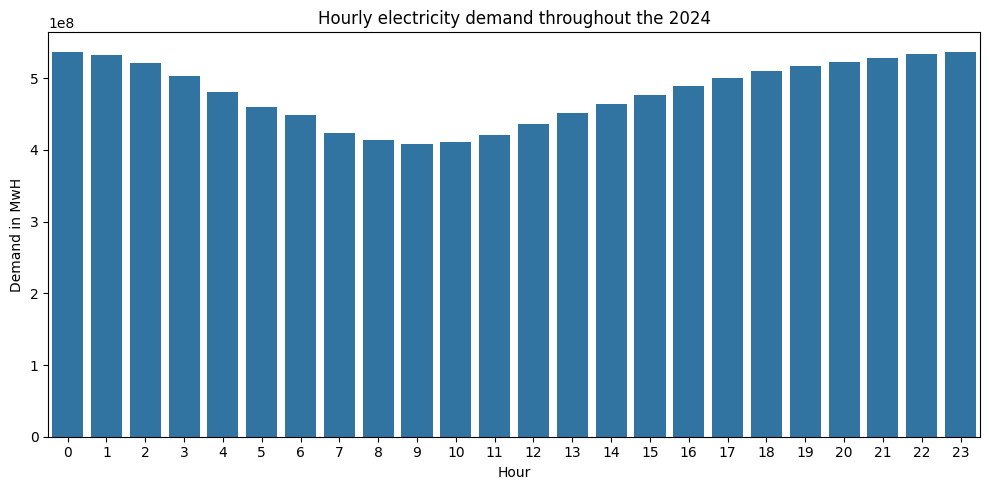

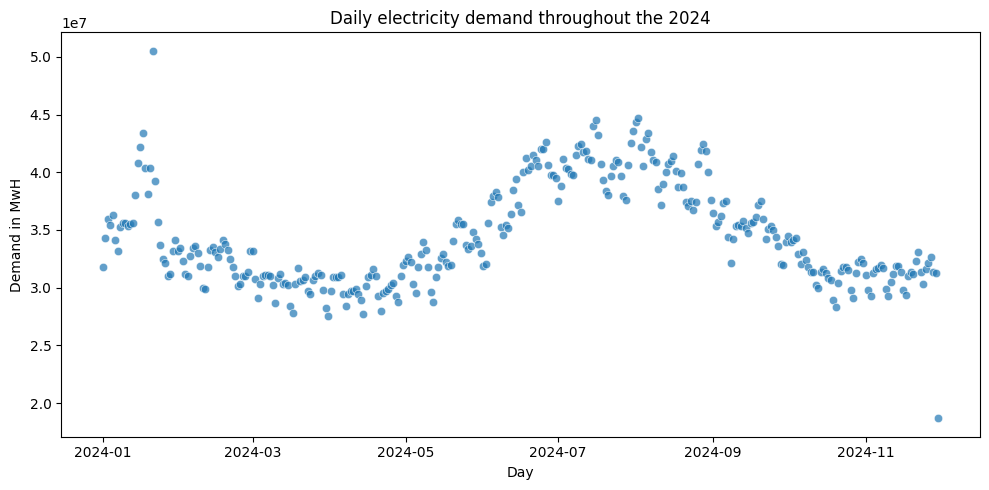

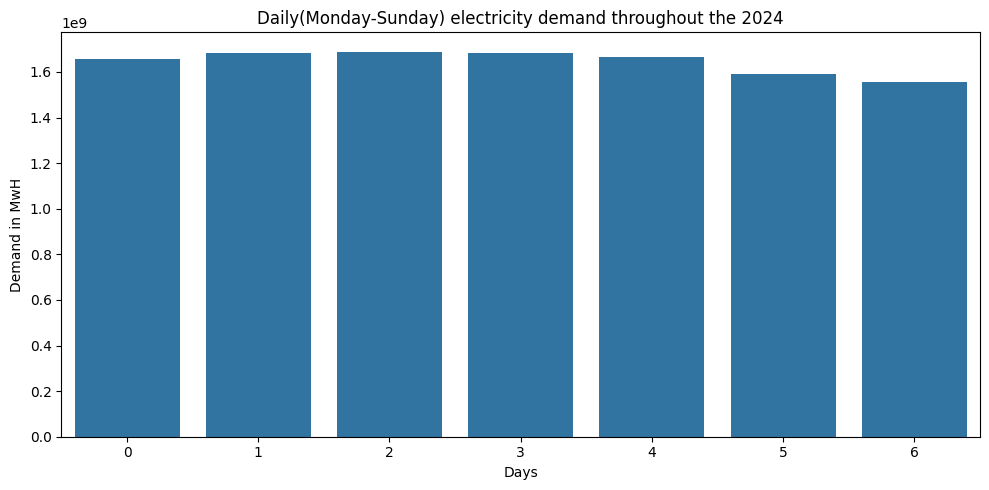

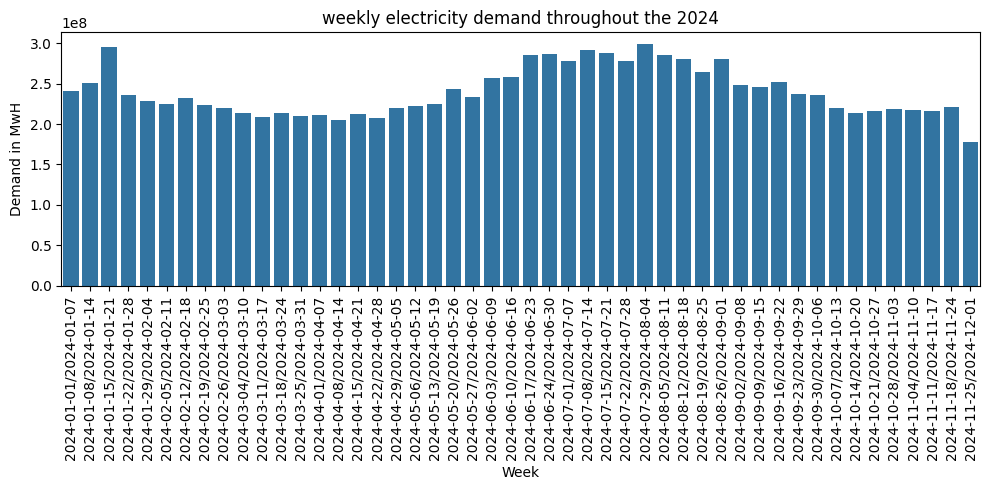

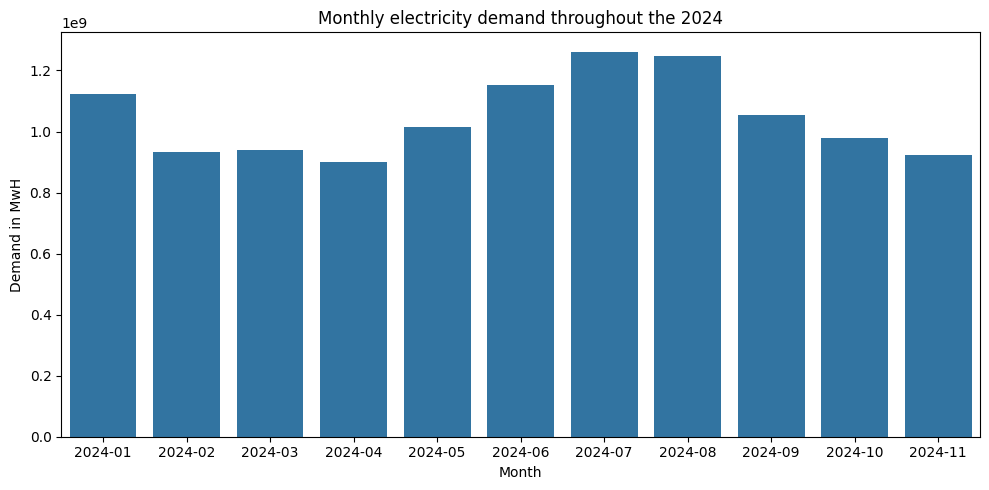

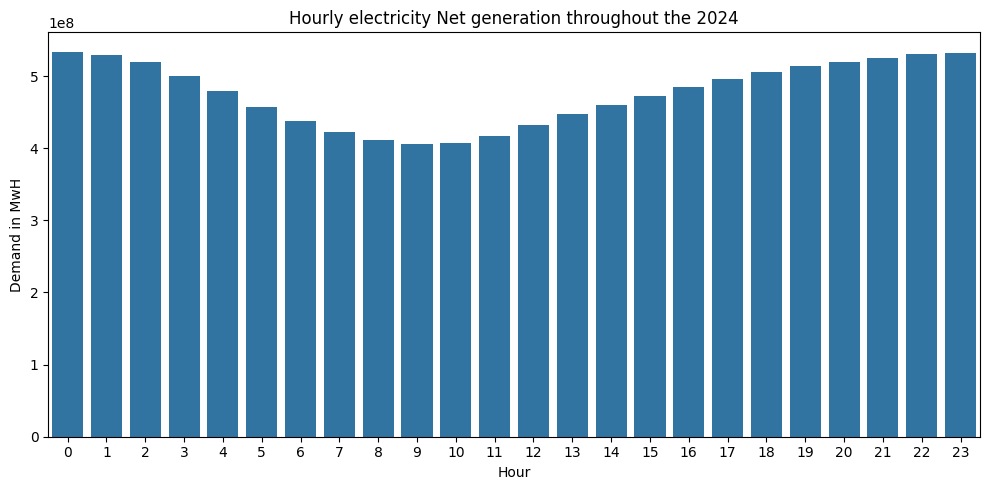

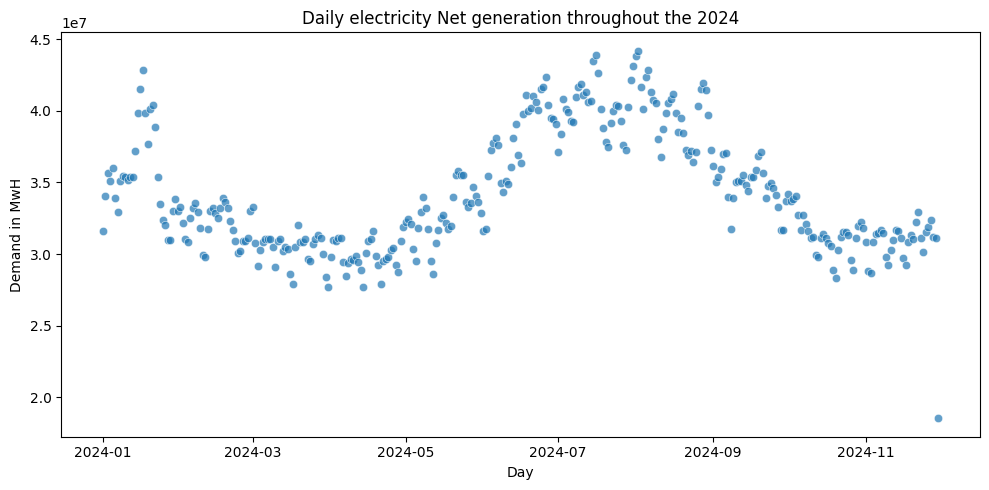

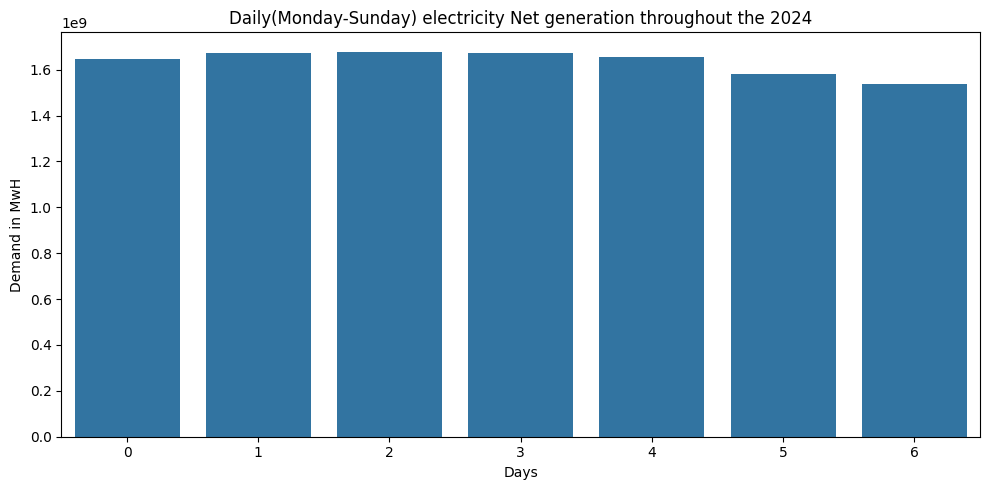

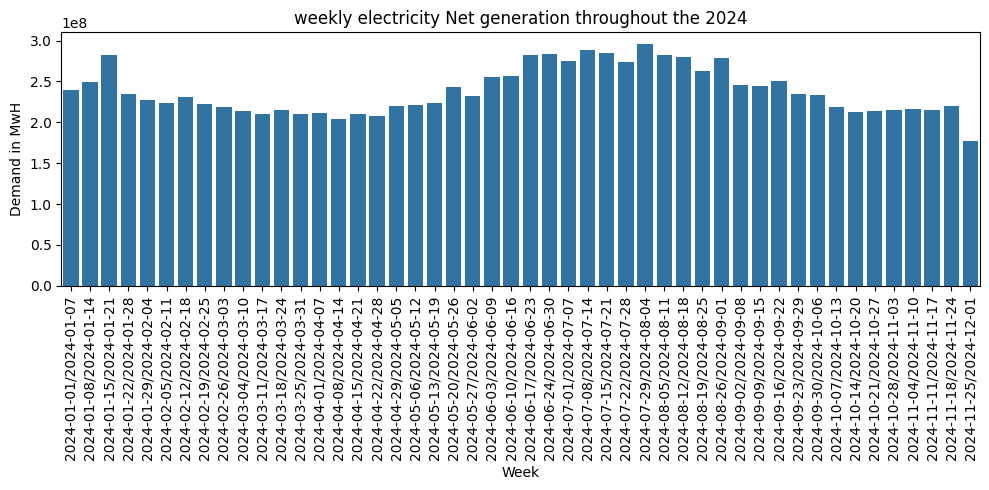

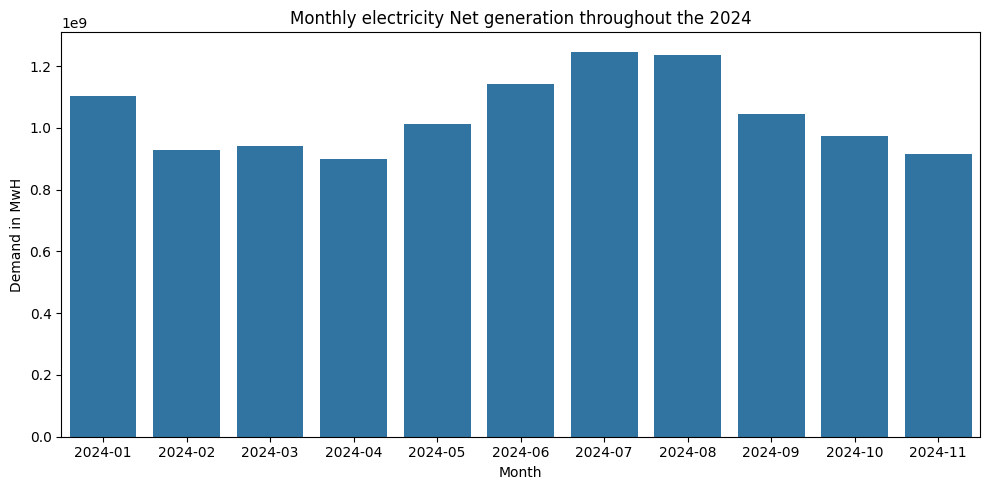

In [217]:
## visualizing the demand and net generation of multiple dates and times
hourly_demand = load_df.groupby(["hour", "type"])["value"].sum().reset_index()
hourly_demand_pivot = hourly_demand.pivot(index="hour", columns="type", values="value")

daily_demand = load_df.groupby(["date", "type"])["value"].sum().reset_index()
daily_demand_pivot = daily_demand.pivot(index="date", columns="type", values="value")

weekly_day_demand = load_df.groupby(["day_of_week", "type"])["value"].sum().reset_index()
weekly_day_demand_pivot = weekly_day_demand.pivot(index="day_of_week", columns="type", values="value")

weekly_demand = load_df.groupby(["weekly_period", "type"])["value"].sum().reset_index()
weekly_demand_pivot = weekly_demand.pivot(index="weekly_period", columns="type", values="value")

monthly_demand = load_df.groupby(["month", "type"])["value"].sum().reset_index()
monthly_demand_pivot = monthly_demand.pivot(index="month", columns="type", values="value")
## adding necessary timestamp cols to make more aggregations on the data
d_demand_hourly = hourly_demand[hourly_demand["type"] == "D"]
d_demand_daily = daily_demand[daily_demand["type"] == "D"]
d_demand_weekly_day = weekly_day_demand[weekly_day_demand["type"] == "D"]
d_demand_weekly = weekly_demand[weekly_demand["type"] == "D"]
d_demand_monthly = monthly_demand[monthly_demand["type"] == "D"]

plt.figure(figsize=(10,5))
sns.barplot(data=d_demand_hourly,x="hour", y="value")
plt.title("Hourly electricity demand throughout the 2024")
plt.ylabel("Demand in MwH")
plt.xlabel("Hour")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(data=d_demand_daily,x="date", y="value", alpha=0.7)
plt.title("Daily electricity demand throughout the 2024")
plt.ylabel("Demand in MwH")
plt.xlabel("Day")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=d_demand_weekly_day, x="day_of_week", y="value")
plt.title("Daily(Monday-Sunday) electricity demand throughout the 2024")
plt.ylabel("Demand in MwH")
plt.xlabel("Days")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=d_demand_weekly,x="weekly_period", y="value")
plt.title("weekly electricity demand throughout the 2024")
plt.ylabel("Demand in MwH")
plt.xlabel("Week")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=d_demand_monthly,x="month", y="value")
plt.title("Monthly electricity demand throughout the 2024")
plt.ylabel("Demand in MwH")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

d_generation_hourly = hourly_demand[hourly_demand["type"] == "NG"]
d_generation_daily = daily_demand[daily_demand["type"] == "NG"]
d_generation_weekly_day = weekly_day_demand[weekly_day_demand["type"] == "NG"]
d_generation_weekly = weekly_demand[weekly_demand["type"] == "NG"]
d_generation_monthly = monthly_demand[monthly_demand["type"] == "NG"]

plt.figure(figsize=(10,5))
sns.barplot(data=d_generation_hourly,x="hour", y="value")
plt.title("Hourly electricity Net generation throughout the 2024")
plt.ylabel("Demand in MwH")
plt.xlabel("Hour")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(data=d_generation_daily,x="date", y="value", alpha=0.7)
plt.title("Daily electricity Net generation throughout the 2024")
plt.ylabel("Demand in MwH")
plt.xlabel("Day")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=d_generation_weekly_day, x="day_of_week", y="value")
plt.title("Daily(Monday-Sunday) electricity Net generation throughout the 2024")
plt.ylabel("Demand in MwH")
plt.xlabel("Days")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=d_generation_weekly,x="weekly_period", y="value")
plt.title("weekly electricity Net generation throughout the 2024")
plt.ylabel("Demand in MwH")
plt.xlabel("Week")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=d_generation_monthly,x="month", y="value")
plt.title("Monthly electricity Net generation throughout the 2024")
plt.ylabel("Demand in MwH")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

In [218]:
energy_df.count()
val_count = energy_df['value'].count()
norm_count = energy_df['period'].count()
missing_vals = norm_count - val_count
missing_vals

3005

In [219]:
## only missing vals are the value in the data.
## this is the only data cleaning step that will be done here
val_mean = energy_df["value"].mean()
energy_df['value'] = energy_df['value'].fillna(val_mean)
energy_df.count()

period             3427514
respondent         3427514
respondent-name    3427514
fueltype           3427514
type-name          3427514
value              3427514
value-units        3427514
dtype: int64

In [220]:
total_electric_used = energy_df['value'].sum()
total_electric_used

12483268161.855352

In [221]:
energy_df["hour"] = energy_df["period"].dt.hour

In [222]:
## aggregating data into hourly generation throughout the day (all fuel types combined)
total_hourly_generation = energy_df.groupby('hour')['value'].sum().reset_index()

total_hourly_generation.rename(columns={'value': 'total_generation_for_hour'}, inplace=True)

total_hourly_generation

,hour,total_generation_for_hour
0,0,5.792936e+08
1,1,5.723675e+08
2,2,5.606190e+08
3,3,5.421305e+08
4,4,5.193189e+08
5,5,4.976917e+08
6,6,4.777214e+08
7,7,4.613150e+08
8,8,4.502391e+08
9,9,4.460404e+08


In [223]:
## Aggregating data into hourly generation throughout the day by the fuel type
data = energy_df.groupby(["hour", "fueltype"])["value"].sum()
data_table = data.unstack(fill_value=0)
data_table.head(100)

fueltype,BAT,COL,GEO,NG,NUC,OIL,OTH,PS,SNB,SUN,UES,UNK,WAT,WND
hour,,,,,,,,,,,,,,
0,366618.0,9.598552e+07,207.0,2.505868e+08,9.783960e+07,1.116723e+06,7.352985e+06,109317.0,546.0,3.088822e+07,-24360.0,0.0,4.093138e+07,5.414009e+07
1,319446.0,9.692966e+07,102.0,2.511909e+08,9.758205e+07,1.011683e+06,9.167407e+06,80535.0,3102.0,1.911531e+07,-21756.0,0.0,4.088594e+07,5.610309e+07
2,205896.0,9.546084e+07,105.0,2.467816e+08,9.755817e+07,8.996099e+05,1.083702e+07,37878.0,2097.0,1.011857e+07,-28569.0,0.0,3.953194e+07,5.921381e+07
3,170112.0,9.175203e+07,102.0,2.358746e+08,9.753125e+07,7.416718e+05,1.234054e+07,30570.0,1059.0,4.090970e+06,-41367.0,0.0,3.716574e+07,6.247330e+07
4,131025.0,8.667153e+07,90.0,2.218288e+08,9.749761e+07,5.174148e+05,1.294128e+07,29007.0,180.0,1.082597e+06,-54747.0,0.0,3.420998e+07,6.446409e+07
5,104115.0,8.134103e+07,105.0,2.099293e+08,9.742920e+07,4.763048e+05,1.169320e+07,27117.0,57.0,5.099638e+05,-59985.0,0.0,3.122872e+07,6.501250e+07
6,61173.0,7.710612e+07,105.0,1.990149e+08,9.755419e+07,4.544157e+05,1.034944e+07,3627.0,99.0,3.514088e+05,-76806.0,0.0,2.813598e+07,6.476670e+07
7,37626.0,7.366244e+07,108.0,1.916504e+08,9.753955e+07,4.443157e+05,8.555961e+06,2790.0,-6.0,2.274708e+05,-83385.0,0.0,2.541574e+07,6.386202e+07
8,24387.0,7.158906e+07,108.0,1.871344e+08,9.754524e+07,4.547658e+05,7.087029e+06,2460.0,-48.0,1.733838e+05,-93981.0,0.0,2.356255e+07,6.275975e+07


fueltype            BAT           COL         GEO            NG           NUC  \
count         24.000000  2.400000e+01   24.000000  2.400000e+01  2.400000e+01   
mean       88011.250000  8.397289e+07  175.250000  2.167361e+08  9.759211e+07   
std        97842.079771  8.062087e+06   52.492857  2.027497e+07  1.021292e+05   
min        12951.000000  7.089507e+07   90.000000  1.863062e+08  9.742920e+07   
25%        21262.500000  7.764439e+07  107.250000  2.033594e+08  9.753117e+07   
50%        38908.500000  8.439181e+07  207.000000  2.117583e+08  9.755618e+07   
75%       132250.500000  8.966501e+07  216.000000  2.325821e+08  9.766267e+07   
max       366618.000000  9.692966e+07  219.000000  2.511909e+08  9.783960e+07   

fueltype           OIL           OTH            PS          SNB           SUN  \
count     2.400000e+01  2.400000e+01      24.00000    24.000000  2.400000e+01   
mean      7.705402e+05  7.593129e+06   36911.75000   768.500000  2.566874e+07   
std       2.501642e+05  2.5

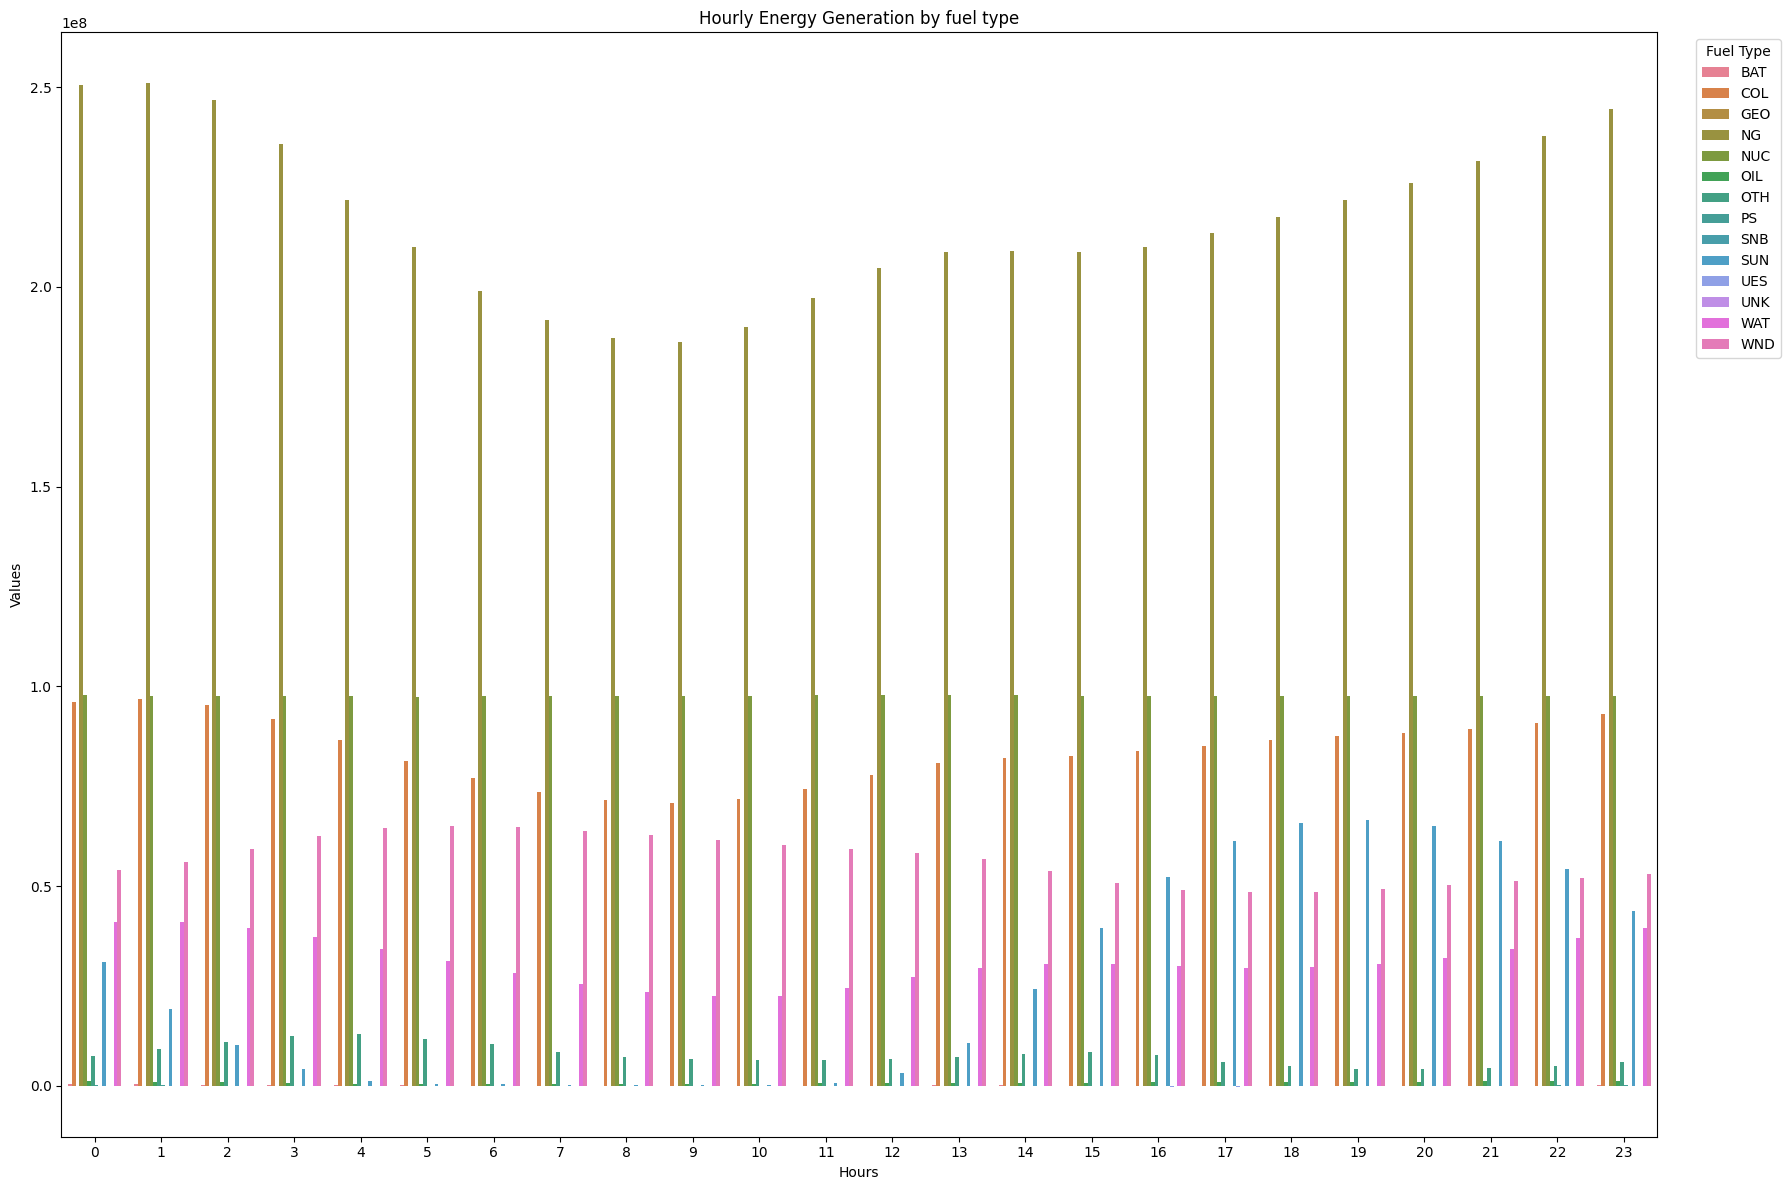

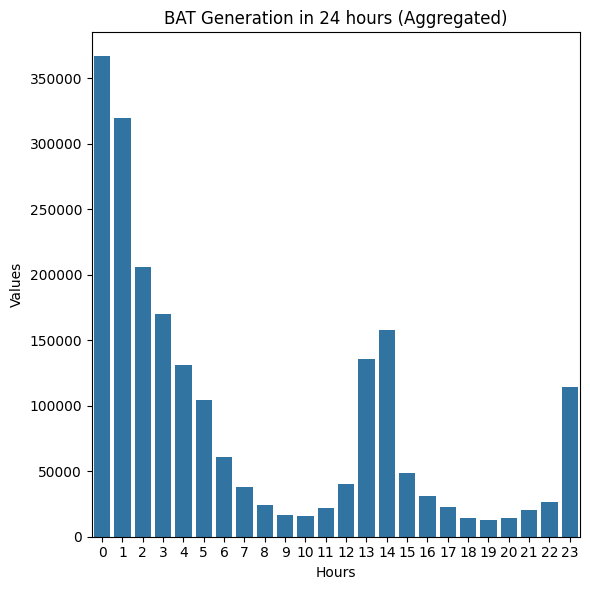

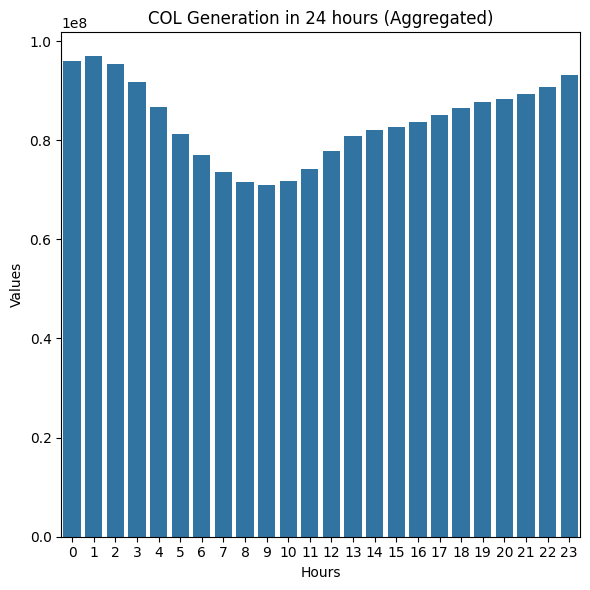

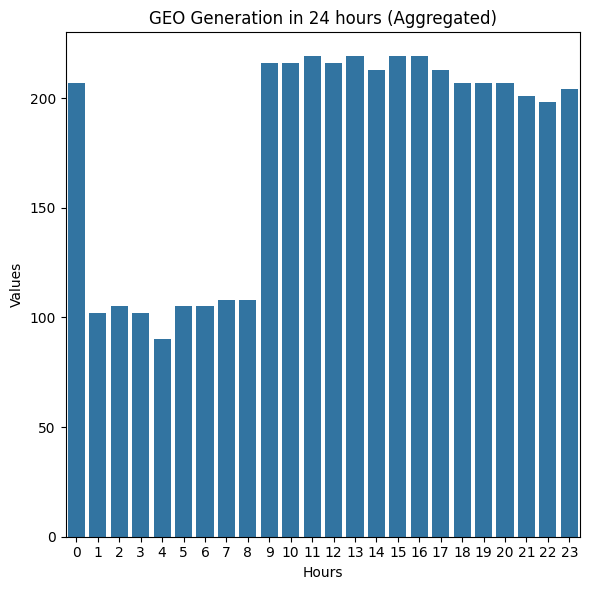

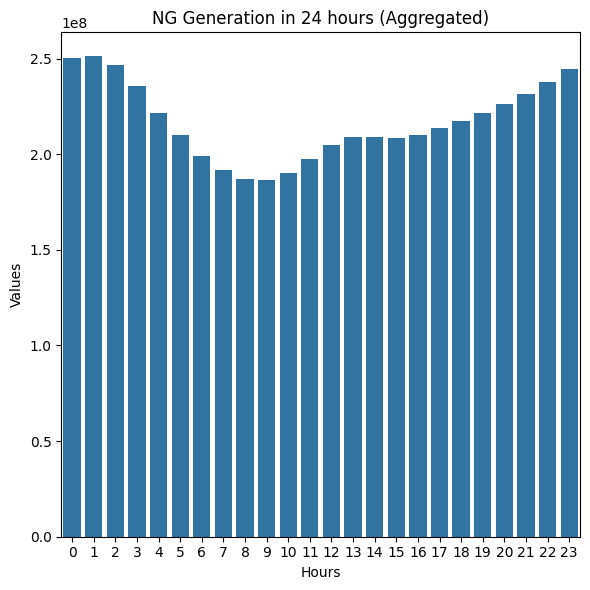

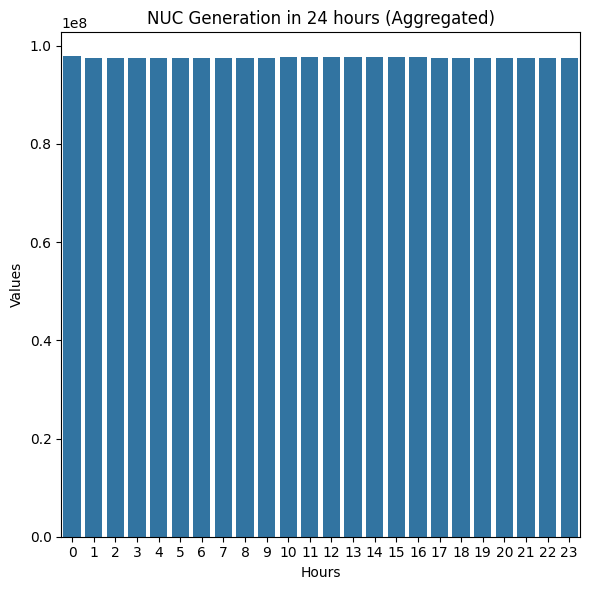

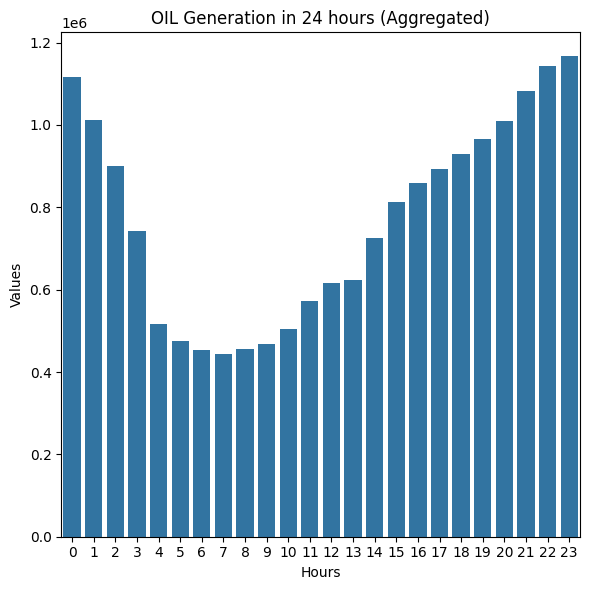

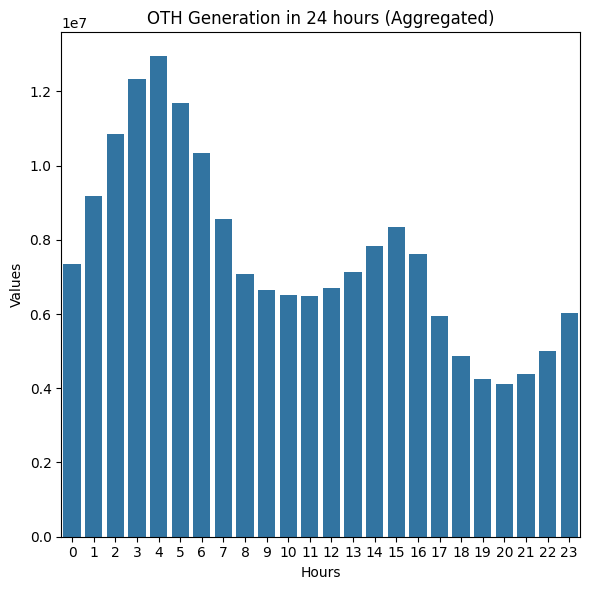

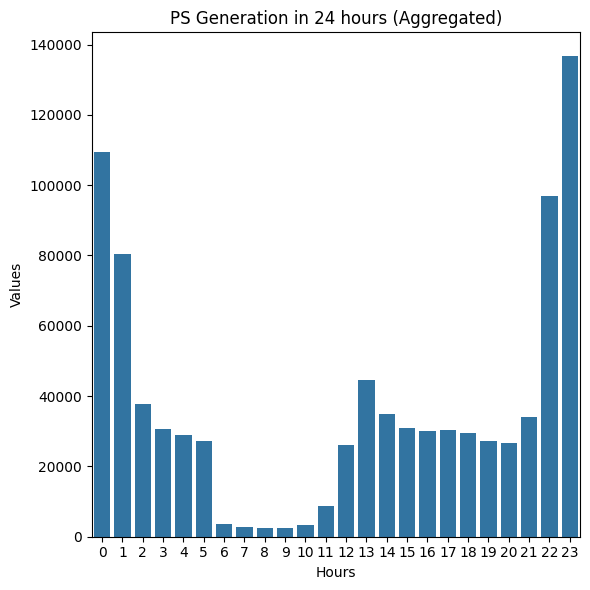

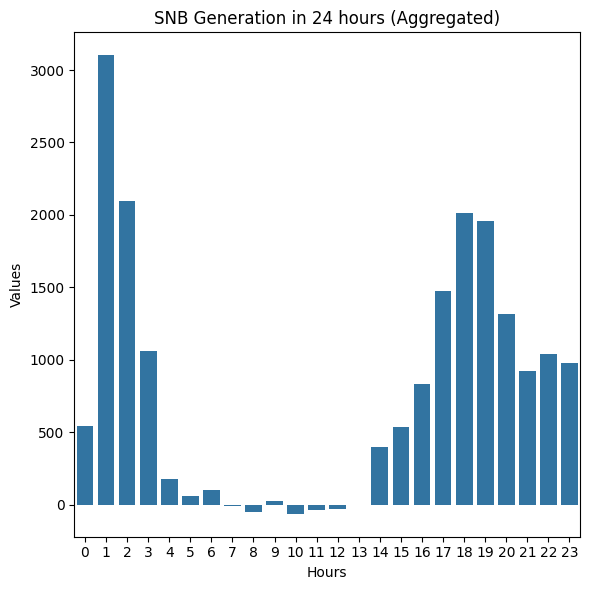

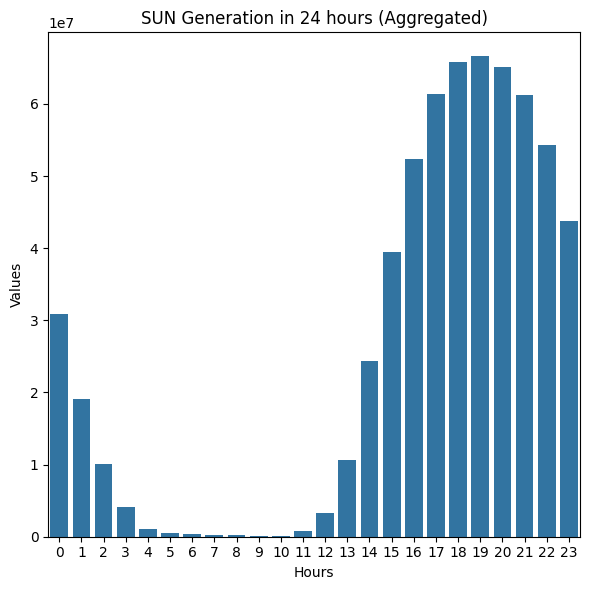

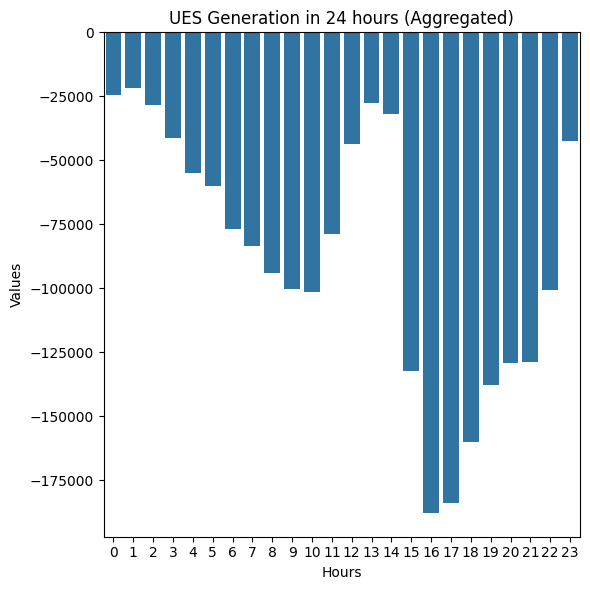

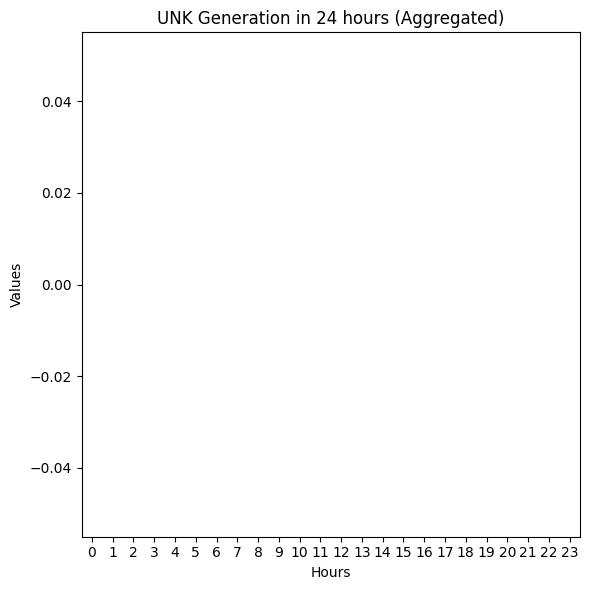

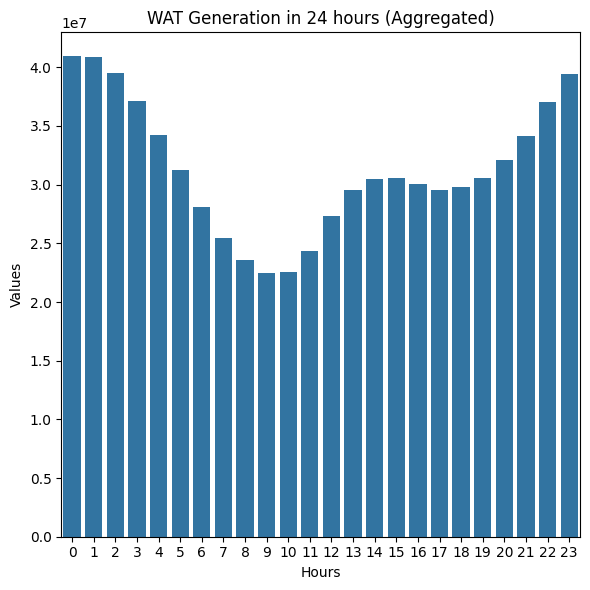

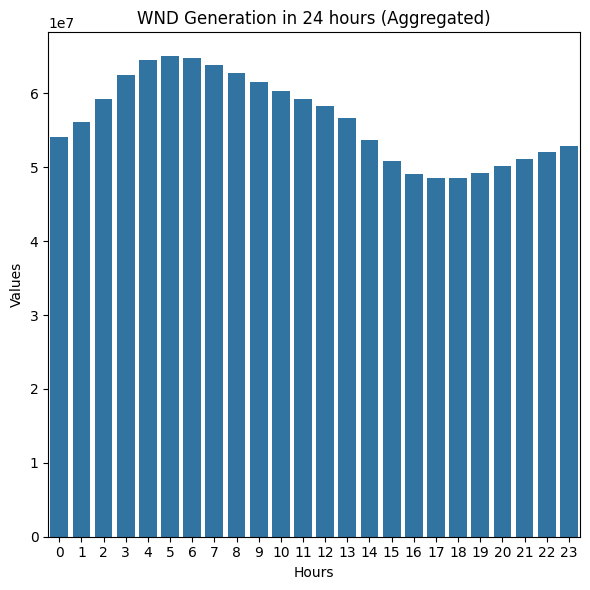

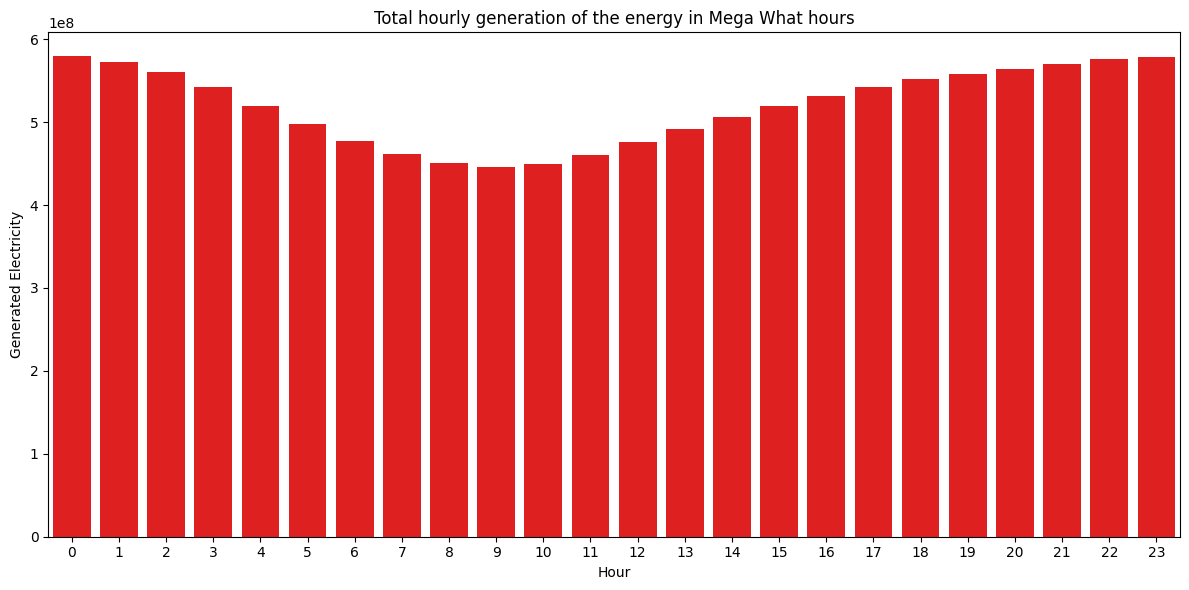

In [224]:
### Hourly analysis of the data 

# getting the overall statistics
print(data_table.describe())

stats = {}

for col in data_table.columns:
    stats[col] = {
        "mean": data_table[col].mean(),
        "median": data_table[col].median()
    }
stats_df = pd.DataFrame.from_dict(stats, orient='index')

# creating a long form table to efficiently display fuel usage by hour
data_table_long = data_table.reset_index()
df_long_hourly = data_table_long.melt(id_vars='hour', var_name='fueltype', value_name='value')

# visualazing the data
plt.figure(figsize=(20,12))
sns.barplot(data=df_long_hourly, x='hour', y='value', hue='fueltype')
plt.title("Hourly Energy Generation by fuel type")
plt.xlabel("Hours")
plt.ylabel("Values")
plt.legend(title='Fuel Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

#checking the energy source usage one by one to get a deeper understanding of the issue

for col in data_table.columns:
    plt.figure(figsize=(6,6))
    sns.barplot(data=df_long_hourly[df_long_hourly['fueltype'] == col], x='hour', y='value')
    plt.title(f"{col} Generation in 24 hours (Aggregated)")
    plt.xlabel("Hours")
    plt.ylabel("Values")
    plt.tight_layout()
    plt.show()

#visualizing the total hourly generation of the data
plt.figure(figsize=(12,6))
sns.barplot(data=total_hourly_generation, x='hour', y='total_generation_for_hour', color='red')
plt.title(f"Total hourly generation of the energy in Mega What hours")
plt.xlabel("Hour")
plt.ylabel("Generated Electricity")
plt.tight_layout()
plt.show()

In [225]:
df_long_hourly.head()

,hour,fueltype,value
0,0,BAT,366618.0
1,1,BAT,319446.0
2,2,BAT,205896.0
3,3,BAT,170112.0
4,4,BAT,131025.0


In [226]:
stats_df

,mean,median
BAT,8.801125e+04,3.890850e+04
COL,8.397289e+07,8.439181e+07
GEO,1.752500e+02,2.070000e+02
NG,2.167361e+08,2.117583e+08
NUC,9.759211e+07,9.755618e+07
OIL,7.705402e+05,7.773712e+05
OTH,7.593129e+06,7.115373e+06
PS,3.691175e+04,2.978400e+04
SNB,7.685000e+02,5.400000e+02
SUN,2.566874e+07,1.488844e+07


In [227]:
### this one groups the data in a weekly period
energy_df["weekly_period"] = energy_df['period'].dt.to_period("W")
### this categorizes weekly data in week days
energy_df["day_of_week"] = energy_df['period'].dt.day_of_week
energy_df

,period,respondent,respondent-name,fueltype,type-name,value,value-units,hour,weekly_period,day_of_week
0,2024-01-01,AECI,"Associated Electric Cooperative, Inc.",COL,Coal,2162.0,megawatthours,0,2024-01-01/2024-01-07,0
1,2024-01-01,AECI,"Associated Electric Cooperative, Inc.",NG,Natural Gas,984.0,megawatthours,0,2024-01-01/2024-01-07,0
2,2024-01-01,AECI,"Associated Electric Cooperative, Inc.",WND,Wind,244.0,megawatthours,0,2024-01-01/2024-01-07,0
3,2024-01-01,AVA,Avista Corporation,NG,Natural Gas,378.0,megawatthours,0,2024-01-01/2024-01-07,0
4,2024-01-01,AVA,Avista Corporation,OTH,Other,129.0,megawatthours,0,2024-01-01/2024-01-07,0
...,...,...,...,...,...,...,...,...,...,...
3427509,2024-12-31,WALC,Western Area Power Administration - Desert Sou...,WAT,Hydro,0.0,megawatthours,0,2024-12-30/2025-01-05,1
3427510,2024-12-31,WALC,Western Area Power Administration - Desert Sou...,WND,Wind,81.0,megawatthours,0,2024-12-30/2025-01-05,1
3427511,2024-12-31,WAUW,Western Area Power Administration - Upper Grea...,WAT,Hydro,69.0,megawatthours,0,2024-12-30/2025-01-05,1
3427512,2024-12-31,WWA,"NaturEner Wind Watch, LLC",WND,Wind,0.0,megawatthours,0,2024-12-30/2025-01-05,1


In [228]:
### analyzing the weekly data 1. by week, 2. by day
data_weekly = energy_df.groupby(["weekly_period", "fueltype"])["value"].sum()
data_table_weekly = data_weekly.unstack(fill_value=0)
data_weekly_day = energy_df.groupby(["day_of_week", "fueltype"])["value"].sum()
data_table_weekly_day = data_weekly_day.unstack(fill_value=0)
data_table_weekly

fueltype,BAT,COL,GEO,NG,NUC,OIL,OTH,PS,SNB,SUN,UES,UNK,WAT,WND
weekly_period,,,,,,,,,,,,,,
2024-01-01/2024-01-07,0.0,4.741285e+07,0.0,1.017388e+08,4.715129e+07,196416.458946,4.784433e+06,0.0,0.0,5.694410e+06,0.0,0.0,1.375958e+07,1.858509e+07
2024-01-08/2024-01-14,0.0,4.881841e+07,0.0,9.060388e+07,4.731466e+07,204411.000000,4.657202e+06,0.0,0.0,5.852739e+06,0.0,0.0,1.476832e+07,3.679459e+07
2024-01-15/2024-01-21,0.0,6.629304e+07,0.0,1.129310e+08,4.763904e+07,744736.458946,5.599820e+06,0.0,0.0,6.404933e+06,0.0,0.0,1.598756e+07,2.733310e+07
2024-01-22/2024-01-28,0.0,4.908830e+07,0.0,1.003136e+08,4.665371e+07,244509.000000,4.568670e+06,0.0,0.0,5.200908e+06,0.0,0.0,1.423379e+07,1.394437e+07
2024-01-29/2024-02-04,0.0,3.852685e+07,0.0,8.844654e+07,4.695742e+07,225210.000000,4.502068e+06,0.0,0.0,7.574495e+06,0.0,0.0,1.606844e+07,2.479865e+07
2024-02-05/2024-02-11,0.0,3.475122e+07,0.0,8.692360e+07,4.817728e+07,190233.000000,2.939891e+06,0.0,0.0,7.021267e+06,0.0,0.0,1.525645e+07,2.877883e+07
2024-02-12/2024-02-18,0.0,3.560493e+07,0.0,9.461306e+07,4.659316e+07,151581.000000,2.946540e+06,0.0,0.0,8.765060e+06,0.0,0.0,1.594788e+07,2.572384e+07
2024-02-19/2024-02-25,0.0,3.179750e+07,0.0,8.701954e+07,4.614848e+07,219262.835783,3.184879e+06,0.0,0.0,1.037818e+07,0.0,0.0,1.511586e+07,2.847871e+07
2024-02-26/2024-03-03,0.0,2.718580e+07,0.0,8.230335e+07,4.533981e+07,204468.000000,2.835047e+06,0.0,0.0,8.701358e+06,0.0,0.0,1.528611e+07,3.773597e+07


In [229]:
data_table_weekly_day

fueltype,BAT,COL,GEO,NG,NUC,OIL,OTH,PS,SNB,SUN,UES,UNK,WAT,WND
day_of_week,,,,,,,,,,,,,,
0,316761.0,2.919363e+08,2526.0,7.531952e+08,3.397236e+08,2.854331e+06,2.681262e+07,136341.0,2871.0,8.827937e+07,-334836.0,0.0,1.091955e+08,2.014266e+08
1,287088.0,2.933332e+08,105.0,7.625720e+08,3.336782e+08,3.138920e+06,2.644415e+07,140355.0,1935.0,8.915680e+07,-268698.0,0.0,1.088793e+08,1.954157e+08
2,270429.0,2.970481e+08,0.0,7.689369e+08,3.338270e+08,3.435147e+06,2.618049e+07,117807.0,2964.0,8.776728e+07,-274044.0,0.0,1.093987e+08,1.880333e+08
3,318834.0,2.960062e+08,0.0,7.648833e+08,3.342663e+08,2.971373e+06,2.654919e+07,134259.0,2640.0,8.826641e+07,-304728.0,0.0,1.096269e+08,1.862975e+08
4,306408.0,2.908303e+08,0.0,7.518586e+08,3.350147e+08,2.371633e+06,2.630809e+07,136065.0,3147.0,8.757323e+07,-300276.0,0.0,1.107619e+08,1.939857e+08
5,294540.0,2.760349e+08,0.0,7.114429e+08,3.329876e+08,1.799662e+06,2.517298e+07,119154.0,2331.0,8.806105e+07,-283449.0,0.0,1.035742e+08,1.927786e+08
6,318210.0,2.701605e+08,1575.0,6.887780e+08,3.327132e+08,1.921899e+06,2.476759e+07,101901.0,2556.0,8.694565e+07,-304458.0,0.0,9.973370e+07,1.972054e+08


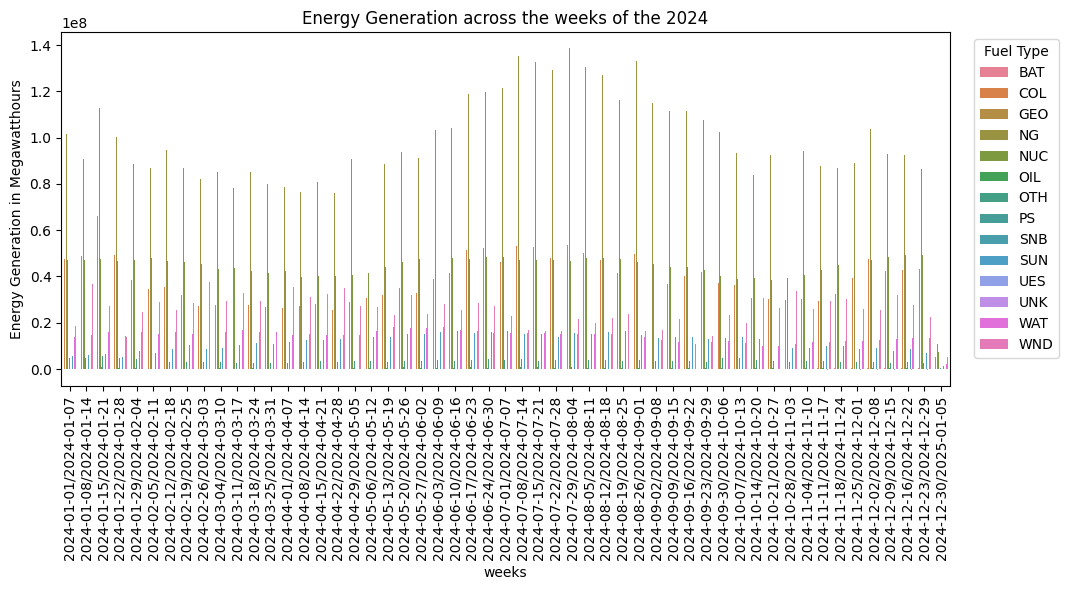

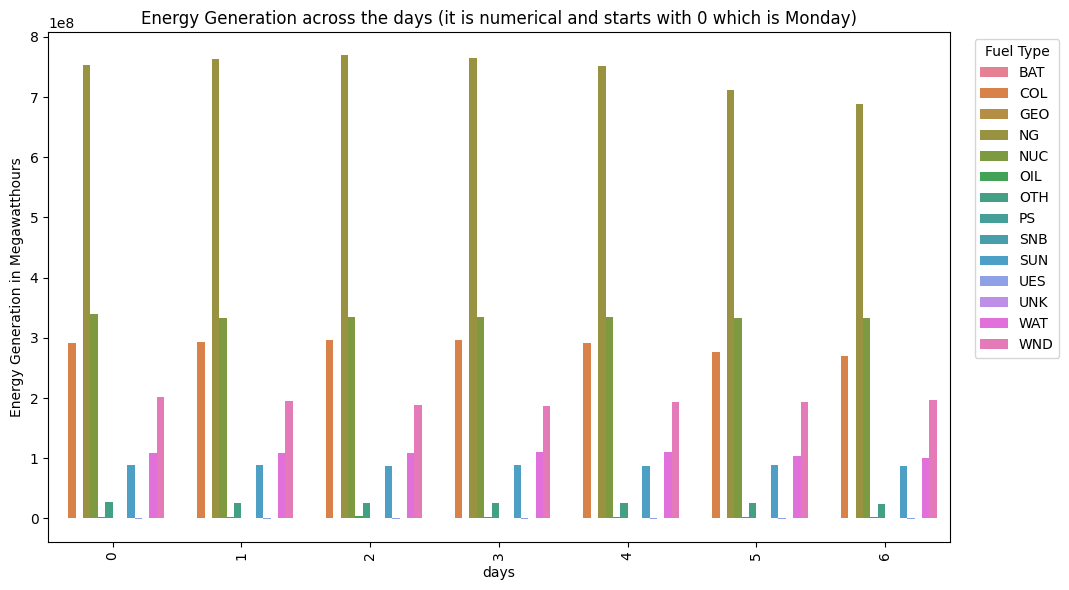

In [230]:
## Visualizing the data for the analysis
#preparing data for visualization
data_table_long = data_table_weekly.reset_index()
df_long_weekly = data_table_long.melt(id_vars='weekly_period', var_name='fueltype', value_name='value')

#plotting the results
plt.figure(figsize=(12,6))
sns.barplot(data=df_long_weekly, x="weekly_period", y="value", hue="fueltype")
plt.legend(title='Fuel Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Energy Generation across the weeks of the 2024")
plt.xlabel("weeks")
plt.ylabel("Energy Generation in Megawatthours")
plt.xticks(rotation=90, ha="center")
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

data_table_long_day = data_table_weekly_day.reset_index()
df_long_week = data_table_long_day.melt(id_vars='day_of_week', var_name='fueltype', value_name='value')

#plotting the results
plt.figure(figsize=(12,6))
sns.barplot(data=df_long_week, x="day_of_week", y="value", hue="fueltype")
plt.legend(title='Fuel Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Energy Generation across the days (it is numerical and starts with 0 which is Monday)")
plt.xlabel("days")
plt.ylabel("Energy Generation in Megawatthours")
plt.xticks(rotation=90, ha="center")
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

In [231]:
## final aggregation and visualizing the data is for the daily aggregation of the whole year which should be 365 distinct datapoints.
energy_df['date'] = energy_df['period'].dt.date
data_daily = energy_df.groupby(["date", "fueltype"])["value"].sum()
data_table_daily = data_daily.unstack(fill_value=0)
data_table_daily

fueltype,BAT,COL,GEO,NG,NUC,OIL,OTH,PS,SNB,SUN,UES,UNK,WAT,WND
date,,,,,,,,,,,,,,
2024-01-01,0.0,5.937012e+06,0.0,1.327246e+07,6769758.0,43947.458946,655603.458946,0.0,0.0,8.479775e+05,0.0,0.0,1966134.0,2139579.0
2024-01-02,0.0,6.331994e+06,0.0,1.429763e+07,6711537.0,22335.000000,674284.000000,0.0,0.0,8.948730e+05,0.0,0.0,2079267.0,3085563.0
2024-01-03,0.0,7.372363e+06,0.0,1.619941e+07,6676737.0,34233.000000,726394.000000,0.0,0.0,7.005040e+05,0.0,0.0,2182830.0,1720614.0
2024-01-04,0.0,6.889068e+06,0.0,1.541530e+07,6658794.0,29259.000000,677934.000000,0.0,0.0,8.054370e+05,0.0,0.0,1990905.0,2677668.0
2024-01-05,0.0,7.330921e+06,0.0,1.505088e+07,6719844.0,23292.000000,723541.000000,0.0,0.0,9.050400e+05,0.0,0.0,2090340.0,3141600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,44775.0,5.978436e+06,0.0,1.256377e+07,7052742.0,57450.000000,420327.000000,19026.0,471.0,9.290770e+05,-42282.0,0.0,1985664.0,3665127.0
2024-12-28,35049.0,5.504171e+06,0.0,1.145568e+07,6957693.0,23208.000000,378384.000000,2610.0,432.0,8.860370e+05,-42015.0,0.0,1872519.0,3847197.0
2024-12-29,36024.0,5.056137e+06,1575.0,1.106857e+07,6975747.0,21549.000000,347180.000000,0.0,408.0,1.071724e+06,-37932.0,0.0,1846662.0,3160995.0


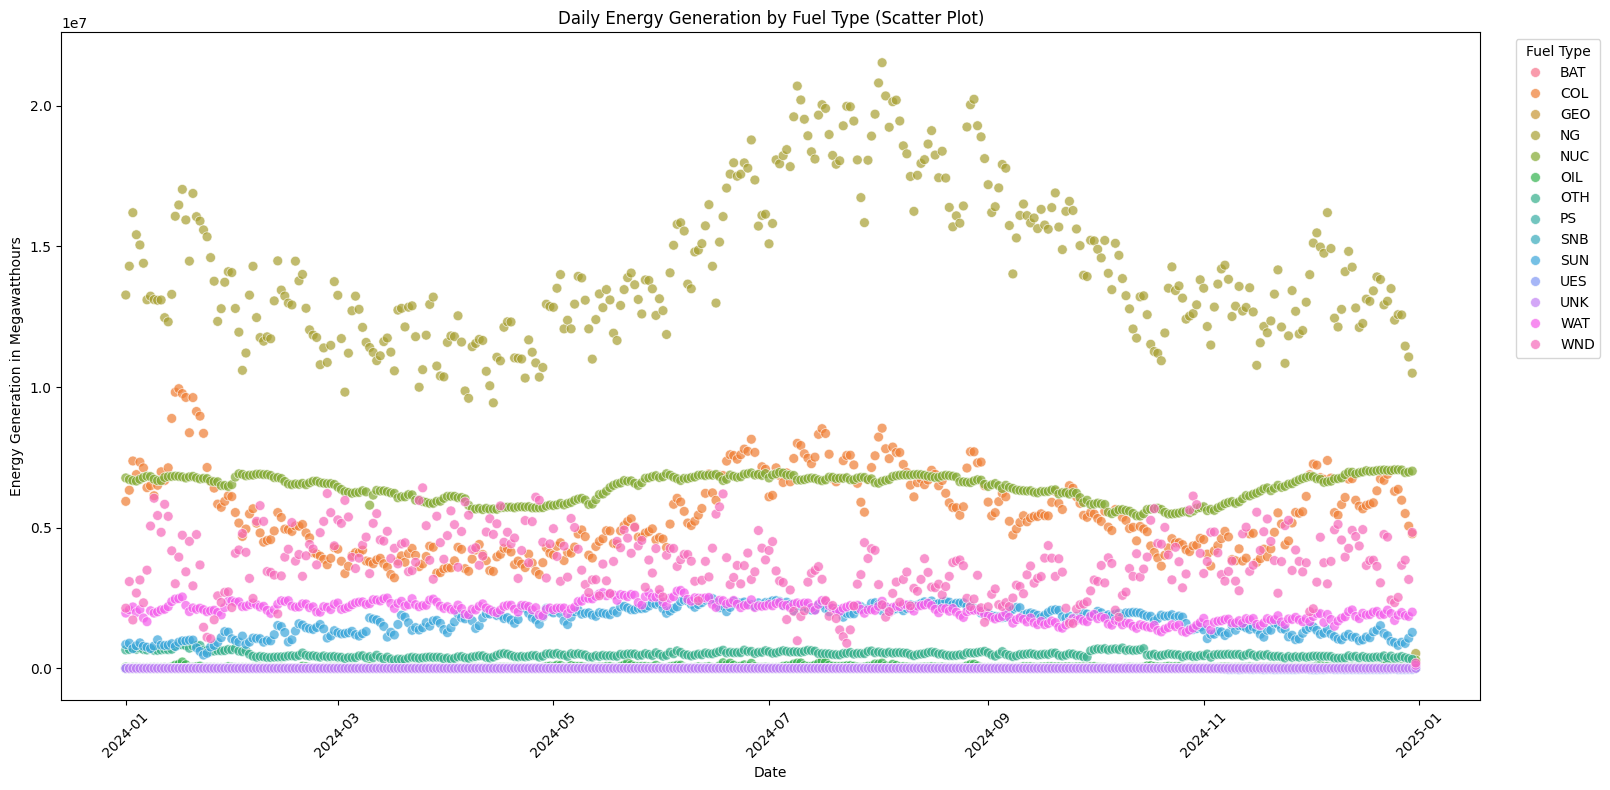

In [232]:
## visualizing the daily aggregated data
data_table_long = data_table_daily.reset_index()
df_long_daily = data_table_long.melt(id_vars='date', var_name='fueltype', value_name='value')
#filtering out fuels that generate 0 electricity
df_long = df_long_daily[df_long_daily['value'] > 0]
plt.figure(figsize=(18, 8))
sns.scatterplot(data=df_long_daily, x='date', y='value', hue='fueltype', alpha=0.7, s=50)
plt.title('Daily Energy Generation by Fuel Type (Scatter Plot)')
plt.xlabel('Date')
plt.ylabel('Energy Generation in Megawatthours')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

### Now it is time to combine both demand and generation to find if the generation with demand was consistent.

In [233]:
energy_df

,period,respondent,respondent-name,fueltype,type-name,value,value-units,hour,weekly_period,day_of_week,date
0,2024-01-01,AECI,"Associated Electric Cooperative, Inc.",COL,Coal,2162.0,megawatthours,0,2024-01-01/2024-01-07,0,2024-01-01
1,2024-01-01,AECI,"Associated Electric Cooperative, Inc.",NG,Natural Gas,984.0,megawatthours,0,2024-01-01/2024-01-07,0,2024-01-01
2,2024-01-01,AECI,"Associated Electric Cooperative, Inc.",WND,Wind,244.0,megawatthours,0,2024-01-01/2024-01-07,0,2024-01-01
3,2024-01-01,AVA,Avista Corporation,NG,Natural Gas,378.0,megawatthours,0,2024-01-01/2024-01-07,0,2024-01-01
4,2024-01-01,AVA,Avista Corporation,OTH,Other,129.0,megawatthours,0,2024-01-01/2024-01-07,0,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...
3427509,2024-12-31,WALC,Western Area Power Administration - Desert Sou...,WAT,Hydro,0.0,megawatthours,0,2024-12-30/2025-01-05,1,2024-12-31
3427510,2024-12-31,WALC,Western Area Power Administration - Desert Sou...,WND,Wind,81.0,megawatthours,0,2024-12-30/2025-01-05,1,2024-12-31
3427511,2024-12-31,WAUW,Western Area Power Administration - Upper Grea...,WAT,Hydro,69.0,megawatthours,0,2024-12-30/2025-01-05,1,2024-12-31
3427512,2024-12-31,WWA,"NaturEner Wind Watch, LLC",WND,Wind,0.0,megawatthours,0,2024-12-30/2025-01-05,1,2024-12-31


In [234]:
load_df

,period,respondent,respondent-name,type,type-name,value,value-units,hour,weekly_period,month,day_of_week,date
0,2024-01-01 00:00:00,AECI,"Associated Electric Cooperative, Inc.",D,Demand,3538.0,megawatthours,0,2024-01-01/2024-01-07,2024-01,0,2024-01-01
2,2024-01-01 00:00:00,AECI,"Associated Electric Cooperative, Inc.",NG,Net generation,3390.0,megawatthours,0,2024-01-01/2024-01-07,2024-01,0,2024-01-01
4,2024-01-01 00:00:00,AVA,Avista Corporation,D,Demand,1583.0,megawatthours,0,2024-01-01/2024-01-07,2024-01,0,2024-01-01
6,2024-01-01 00:00:00,AVA,Avista Corporation,NG,Net generation,988.0,megawatthours,0,2024-01-01/2024-01-07,2024-01,0,2024-01-01
8,2024-01-01 00:00:00,AVRN,"Avangrid Renewables, LLC",NG,Net generation,587.0,megawatthours,0,2024-01-01/2024-01-07,2024-01,0,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2276144,2024-11-30 13:00:00,PACE,PacifiCorp East,NG,Net generation,7324.0,megawatthours,13,2024-11-25/2024-12-01,2024-11,5,2024-11-30
2276146,2024-11-30 13:00:00,PACW,PacifiCorp West,D,Demand,2478.0,megawatthours,13,2024-11-25/2024-12-01,2024-11,5,2024-11-30
2276148,2024-11-30 13:00:00,PACW,PacifiCorp West,NG,Net generation,251.0,megawatthours,13,2024-11-25/2024-12-01,2024-11,5,2024-11-30
2276150,2024-11-30 13:00:00,PGE,Portland General Electric Company,D,Demand,2413.0,megawatthours,13,2024-11-25/2024-12-01,2024-11,5,2024-11-30


In [235]:
## Since demand data does not have fuel type specific values we will combine for generation and find
# adding monthly data 
energy_df["month"] = energy_df["period"].dt.to_period("M")
total_monthly_generation = energy_df.groupby('month')['value'].sum().reset_index()
total_monthly_generation.rename(columns={'value': 'total_generation_for_day'}, inplace=True)

total_daily_generation = energy_df.groupby('date')['value'].sum().reset_index()
total_daily_generation.rename(columns={'value': 'total_generation_for_day'}, inplace=True)

total_weekly_generation = energy_df.groupby('weekly_period')['value'].sum().reset_index()
total_weekly_generation.rename(columns={'value': 'total_generation_for_day'}, inplace=True)

total_hourly_generation = energy_df.groupby('hour')['value'].sum().reset_index()
total_hourly_generation.rename(columns={'value': 'total_generation_for_day'}, inplace=True)

total_weekday_generation = energy_df.groupby('day_of_week')['value'].sum().reset_index()
total_weekday_generation.rename(columns={'value': 'total_generation_for_day'}, inplace=True)

In [236]:
print("total_daily_generation date type:", type(total_daily_generation['date'].iloc[0]))
print("daily_demand_pivot index type:", type(daily_demand_pivot.index[0]))

total_daily_generation date type: <class 'datetime.date'>
daily_demand_pivot index type: <class 'datetime.date'>


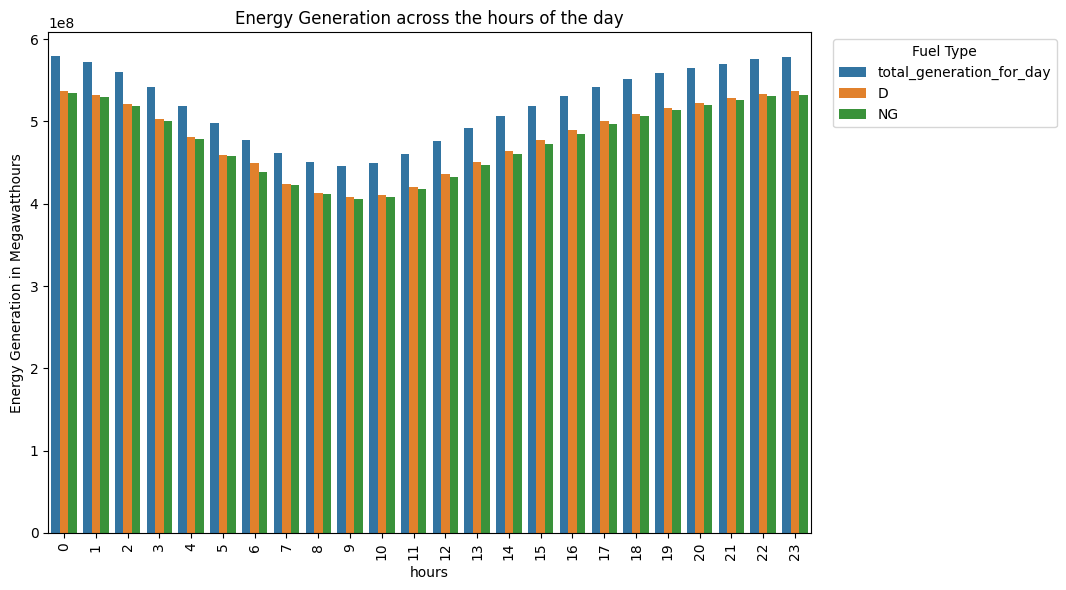

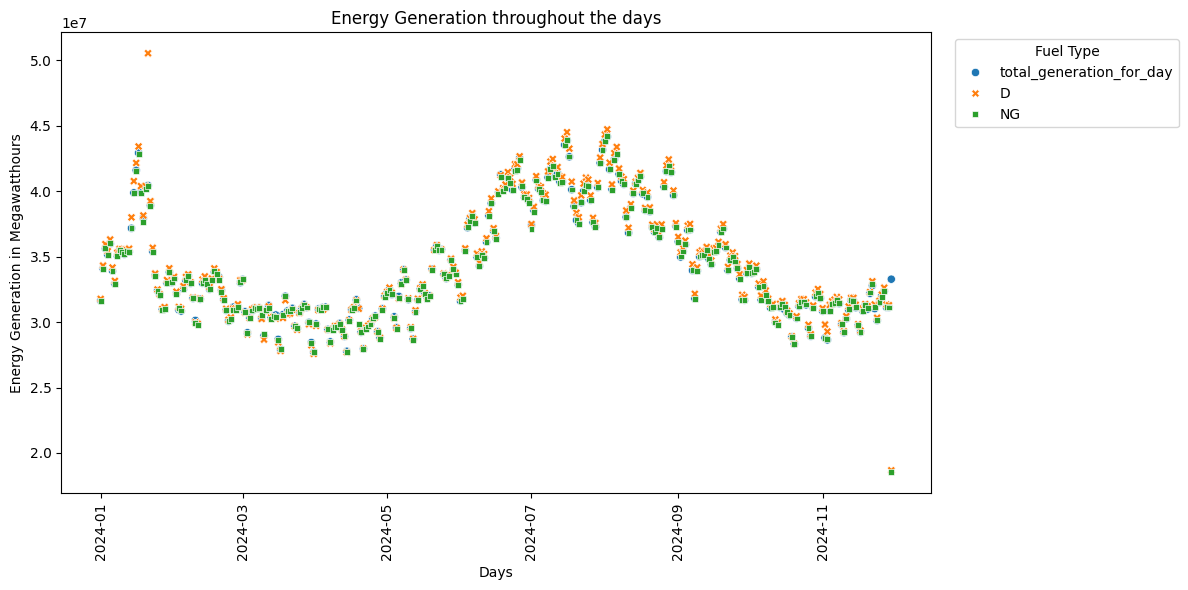

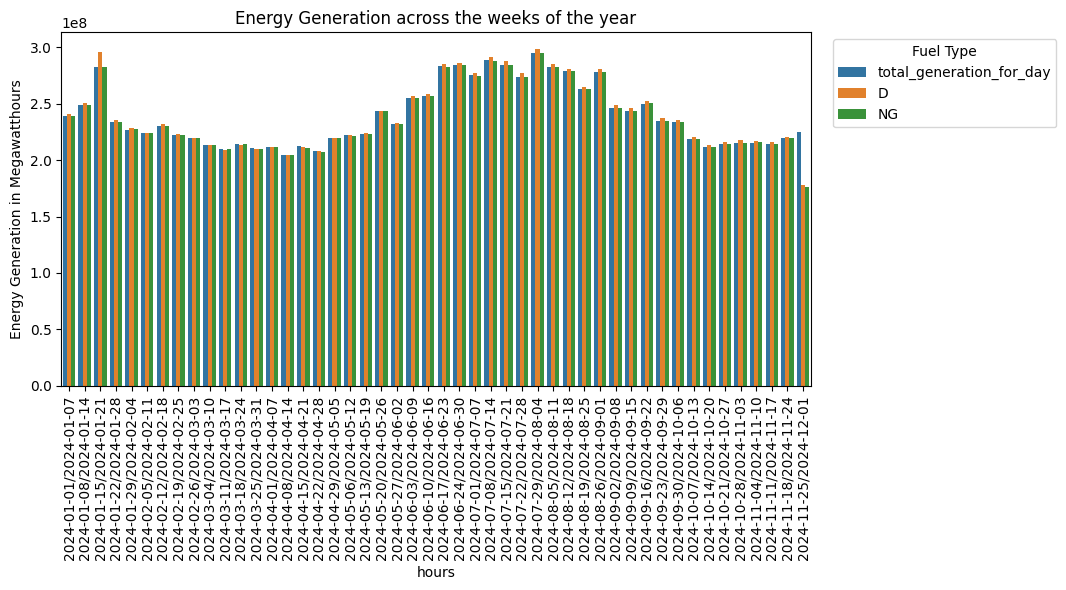

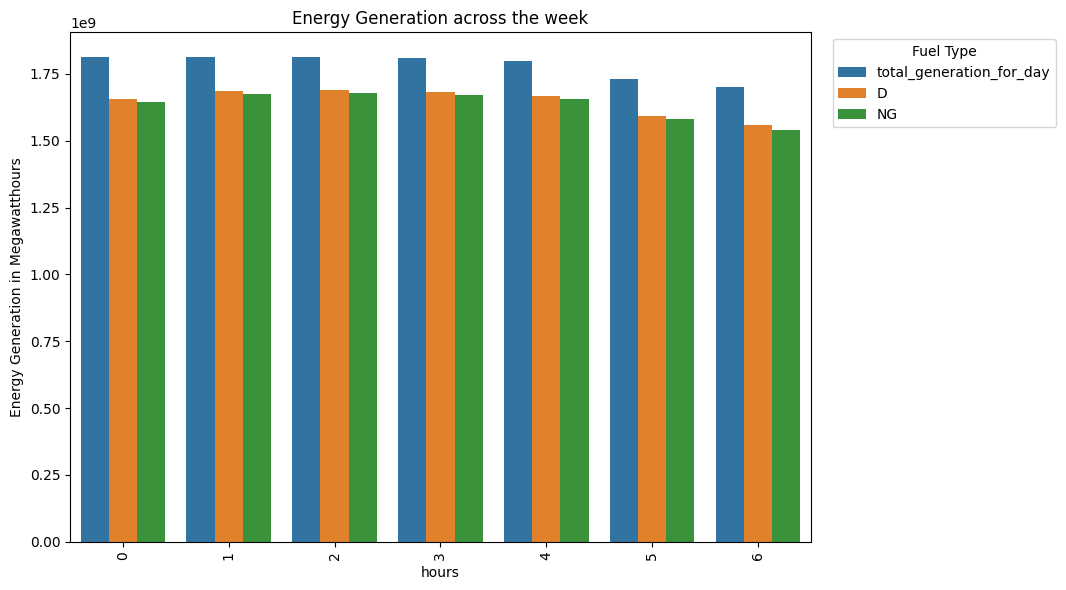

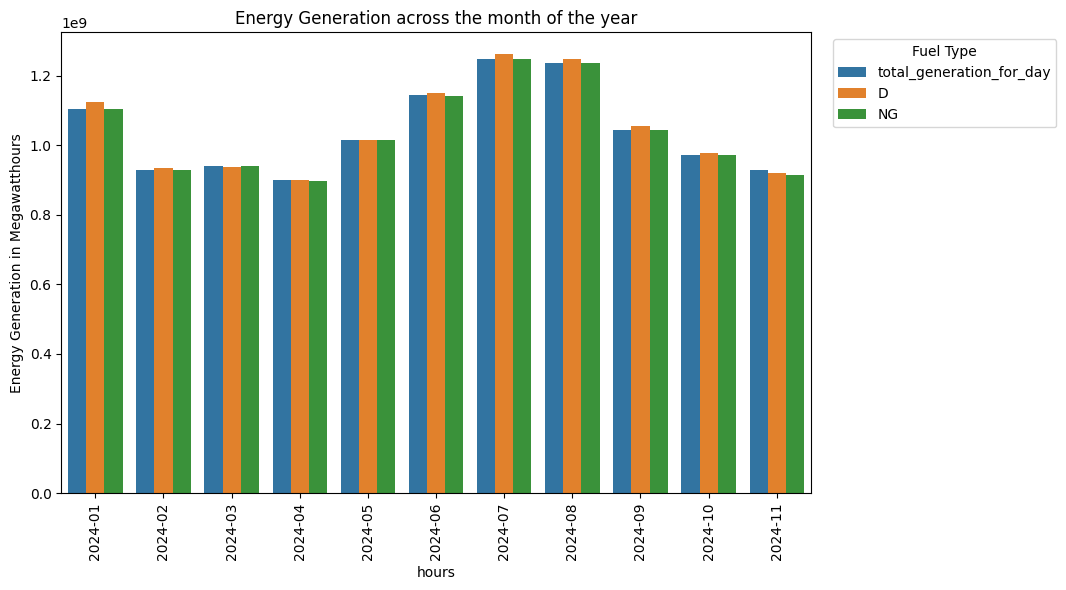

In [237]:
## comparing net generation vs generation data and demand vs generation data
combined_hourly = pd.concat([total_hourly_generation, hourly_demand_pivot], axis=1)
combined_daily = total_daily_generation.merge(daily_demand_pivot, on="date", how="inner")
combined_weekday = pd.concat([total_weekday_generation, weekly_day_demand_pivot], axis=1)
combined_weekly = total_weekly_generation.merge(weekly_demand_pivot, on="weekly_period", how="inner")
combined_monthly = total_monthly_generation.merge(monthly_demand_pivot, on="month", how="inner")

combined_hourly_melted = combined_hourly.reset_index().melt(
    id_vars='hour', 
    value_vars=['total_generation_for_day', 'D', 'NG'],
    var_name='Type', 
    value_name='Energy'
)

combined_daily_melted = combined_daily.reset_index().melt(
    id_vars='date', 
    value_vars=['total_generation_for_day', 'D', 'NG'],
    var_name='Type', 
    value_name='Energy'
)

combined_weekly_melted = combined_weekly.reset_index().melt(
    id_vars='weekly_period', 
    value_vars=['total_generation_for_day', 'D', 'NG'],
    var_name='Type', 
    value_name='Energy'
)

combined_weekday_melted = combined_weekday.reset_index().melt(
    id_vars='day_of_week', 
    value_vars=['total_generation_for_day', 'D', 'NG'],
    var_name='Type', 
    value_name='Energy'
)

combined_monthly_melted = combined_monthly.reset_index().melt(
    id_vars='month', 
    value_vars=['total_generation_for_day', 'D', 'NG'],
    var_name='Type', 
    value_name='Energy'
)

plt.figure(figsize=(12,6))
sns.barplot(data=combined_hourly_melted, x="hour", y="Energy", hue="Type")
plt.legend(title='Fuel Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Energy Generation across the hours of the day")
plt.xlabel("hours")
plt.ylabel("Energy Generation in Megawatthours")
plt.xticks(rotation=90, ha="center")
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(data=combined_daily_melted, x="date", y="Energy", hue="Type", style="Type")
plt.legend(title='Fuel Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Energy Generation throughout the days")
plt.xlabel("Days")
plt.ylabel("Energy Generation in Megawatthours")
plt.xticks(rotation=90, ha="center")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=combined_weekly_melted, x="weekly_period", y="Energy", hue="Type")
plt.legend(title='Fuel Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Energy Generation across the weeks of the year")
plt.xlabel("hours")
plt.ylabel("Energy Generation in Megawatthours")
plt.xticks(rotation=90, ha="center")
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=combined_weekday_melted, x="day_of_week", y="Energy", hue="Type")
plt.legend(title='Fuel Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Energy Generation across the week")
plt.xlabel("hours")
plt.ylabel("Energy Generation in Megawatthours")
plt.xticks(rotation=90, ha="center")
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=combined_monthly_melted, x="month", y="Energy", hue="Type")
plt.legend(title='Fuel Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Energy Generation across the month of the year")
plt.xlabel("hours")
plt.ylabel("Energy Generation in Megawatthours")
plt.xticks(rotation=90, ha="center")
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

In [238]:
combined_daily_melted

,date,Type,Energy
0,2024-01-01,total_generation_for_day,3.163248e+07
1,2024-01-02,total_generation_for_day,3.409748e+07
2,2024-01-03,total_generation_for_day,3.561309e+07
3,2024-01-04,total_generation_for_day,3.514436e+07
4,2024-01-05,total_generation_for_day,3.598546e+07
...,...,...,...
1000,2024-11-26,NG,3.191256e+07
1001,2024-11-27,NG,3.238995e+07
1002,2024-11-28,NG,3.117113e+07
1003,2024-11-29,NG,3.110802e+07


### Using ML models to get deeper insights about the data.

Variance explained by each component: [0.33619342 0.23335942]
Total variance explained: 56.96%


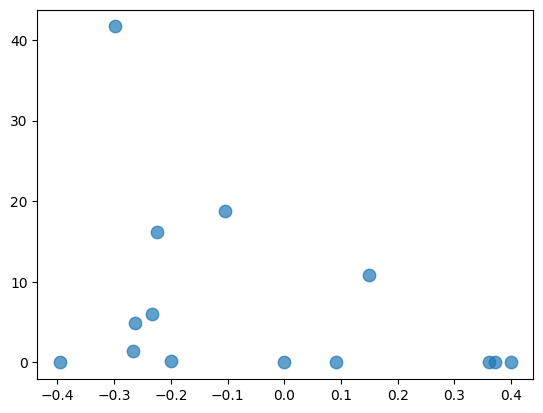

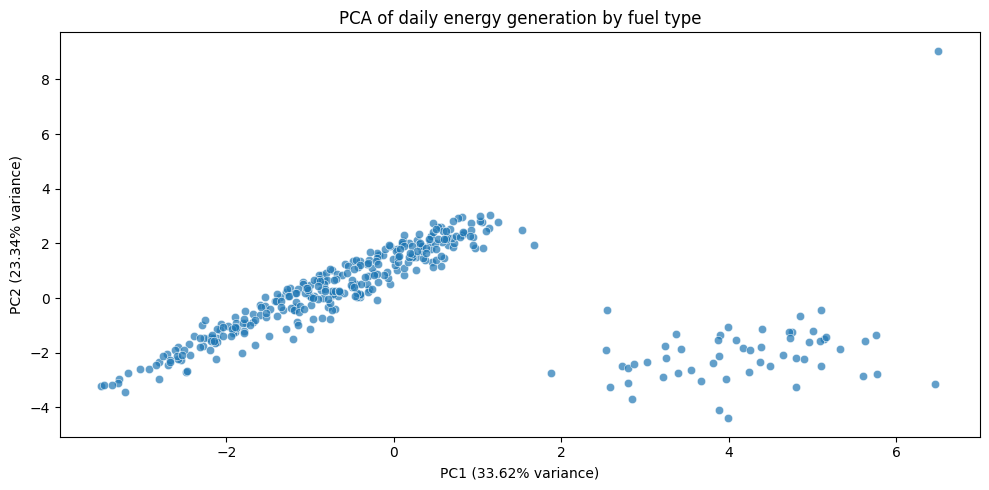

,PC1,PC2
fueltype,,
BAT,0.399282,-0.291436
COL,-0.225054,-0.462078
GEO,0.091308,-0.027550
NG,-0.298851,-0.386152
NUC,-0.103681,-0.388910
OIL,-0.199280,-0.286314
OTH,-0.267029,-0.217551
PS,0.371123,-0.277767
SNB,0.360738,-0.227410


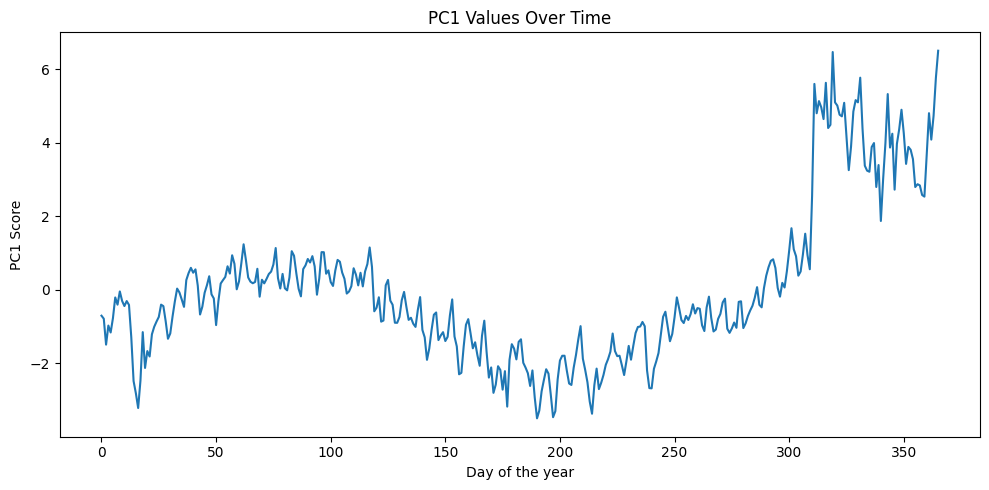

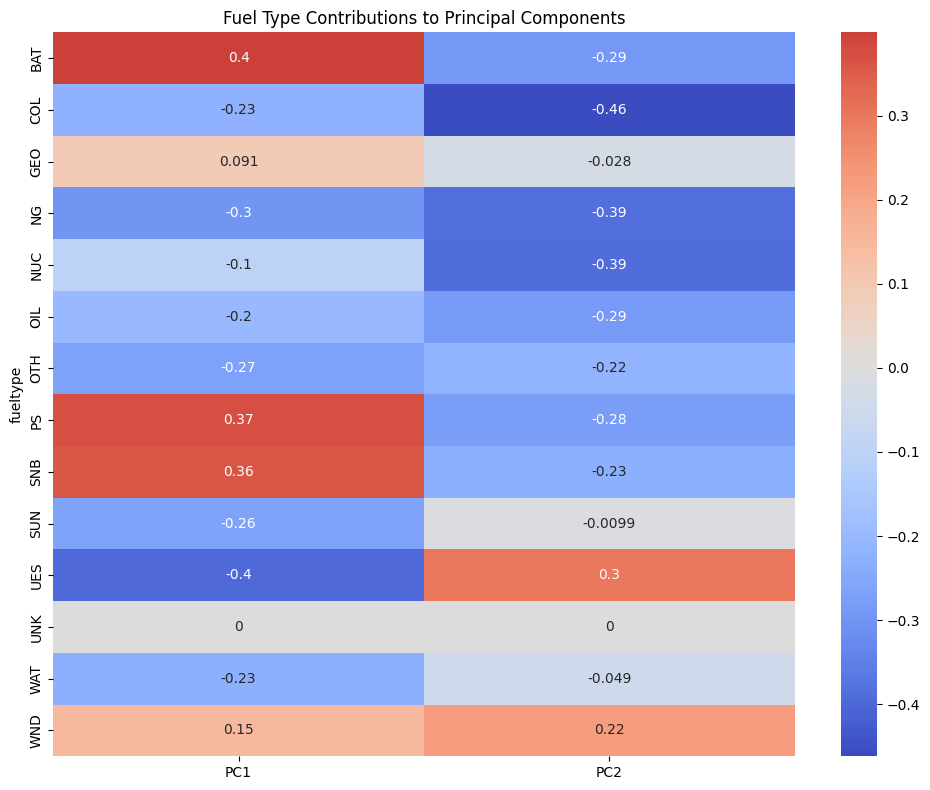

In [239]:
daily_analysis_data = data_table_daily.copy()

# better to standardize data for better results
scaler = StandardScaler()
scaled_data = scaler.fit_transform(daily_analysis_data)
pca = PCA(n_components=2, random_state=1)
pca_res = pca.fit_transform(scaled_data)

results = pd.DataFrame(data=pca_res, columns=["PC1", "PC2"])

total_by_fuel = data_table_daily.sum()
percent_contribution = (total_by_fuel / total_by_fuel.sum()) * 100

# creating a df for understanding how each fuel type is scored
component_df = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=daily_analysis_data.columns
)

#visualizing data to see the patterns
plt.scatter(component_df['PC1'], percent_contribution, s=80, alpha=0.7)

explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by each component: {explained_variance}")
print(f"Total variance explained: {sum(explained_variance):.2%}")

plt.figure(figsize=(10,5))
sns.scatterplot(x=results['PC1'], y=results['PC2'], alpha=0.7) 
plt.title("PCA of daily energy generation by fuel type")
plt.xlabel(f"PC1 ({explained_variance[0]:.2%} variance)")
plt.ylabel(f"PC2 ({explained_variance[1]:.2%} variance)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(results.index, results['PC1'])
plt.title('PC1 Values Over Time')
plt.xlabel('Day of the year')
plt.ylabel('PC1 Score')
plt.tight_layout()

plt.figure(figsize=(10,8))
sns.heatmap(component_df, annot=True, cmap='coolwarm', center=0)
plt.title('Fuel Type Contributions to Principal Components')
plt.tight_layout()

component_df

In [240]:
energy_df['type-name'].unique()

array(['Coal', 'Natural Gas', 'Wind', 'Other', 'Solar', 'Hydro',
       'Nuclear', 'Petroleum', 'Unknown',
       'Solar with integrated battery storage', 'Battery storage',
       'Battery', 'Unknown Energy', 'Unknown energy storage',
       'Solar Battery', 'Pumped Storage', 'Pumped storage', 'Geothermal'],
      dtype=object)

### Kmeans clustering

c:\Users\yusuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


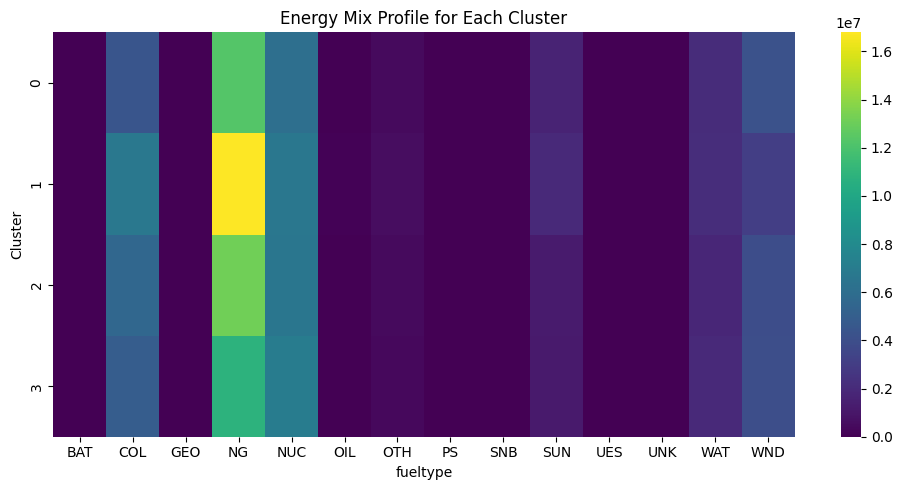

<Figure size 1000x500 with 0 Axes>

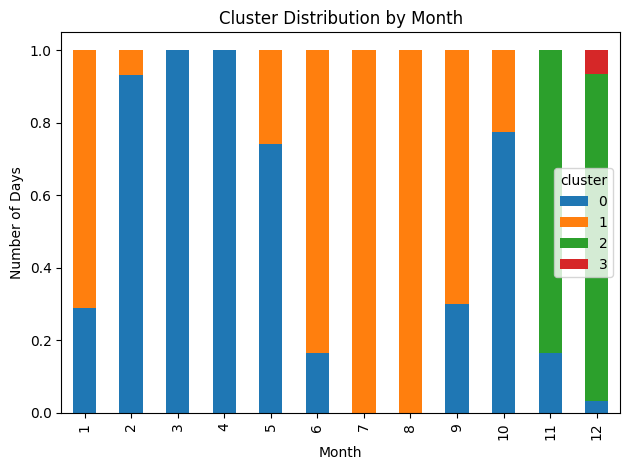

In [241]:
kmeans = KMeans(n_clusters=4, random_state=1)
clusters = kmeans.fit_predict(scaled_data)

daily_clusters = daily_analysis_data.copy()
daily_clusters["cluster"] = clusters
daily_clusters["date"] = daily_analysis_data.index

cluster_profile = daily_clusters.drop(columns=['date']).groupby('cluster').mean()

daily_clusters['month'] = pd.to_datetime(daily_clusters['date']).dt.month
daily_clusters['day_of_week'] = pd.to_datetime(daily_clusters['date']).dt.dayofweek
monthly_distribution = pd.crosstab(daily_clusters['month'], daily_clusters['cluster'], normalize='index')

plt.figure(figsize=(10,5))
sns.heatmap(cluster_profile, cmap='viridis',norm=plt.Normalize(vmin=0, vmax=cluster_profile.values.max()))
plt.title('Energy Mix Profile for Each Cluster')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
monthly_distribution.plot(kind='bar', stacked=True)
plt.title('Cluster Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.tight_layout()
plt.show()